In [8]:
from ik_rl.environment import InvKinDiscrete, InvKinEnvContinous
from ik_rl.task import ReachGoalTask

from stable_baselines3 import SAC

# Inverse Kinematic Reinforcement Learning Environment

In this notebook we provide a simple introduction how to use the environment with stable baselines 3 API

In [9]:
segment_length = 1
n_joints = 1

In [10]:
task = ReachGoalTask(arm_reach=n_joints * segment_length)
env = InvKinEnvContinous(
    task=task, robot_config={"n_joints": n_joints}, relative_angles=True
)

In [11]:
model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 130      |
|    ep_rew_mean     | -61.3    |
| time/              |          |
|    episodes        | 4        |
|    fps             | 104      |
|    time_elapsed    | 4        |
|    total_timesteps | 518      |
| train/             |          |
|    actor_loss      | -3.02    |
|    critic_loss     | 0.0436   |
|    ent_coef        | 0.883    |
|    ent_coef_loss   | -0.42    |
|    learning_rate   | 0.0003   |
|    n_updates       | 417      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 135      |
|    ep_rew_mean     | -62.5    |
| time/              |          |
|    episodes        | 8        |
|    fps             | 95       |
|    time_elapsed    | 11       |
|    total_timesteps | 1082     |
| train/             |

/home/robin/projects/IK-RL/ik_rl/environment.py:124: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/home/robin/projects/IK-RL/ik_rl/environment.py:113: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


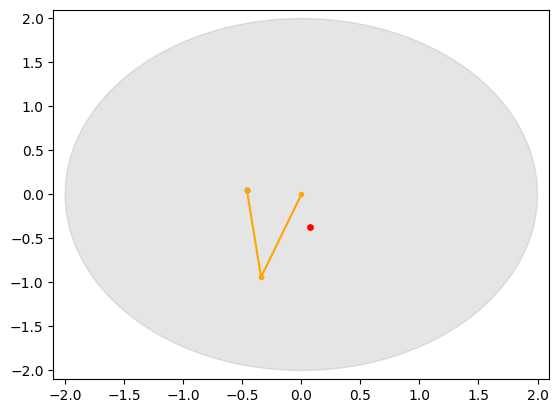

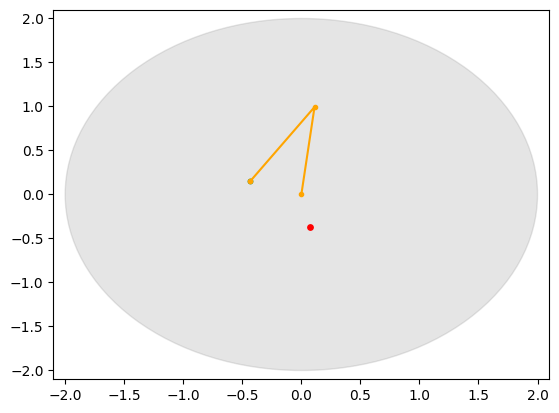

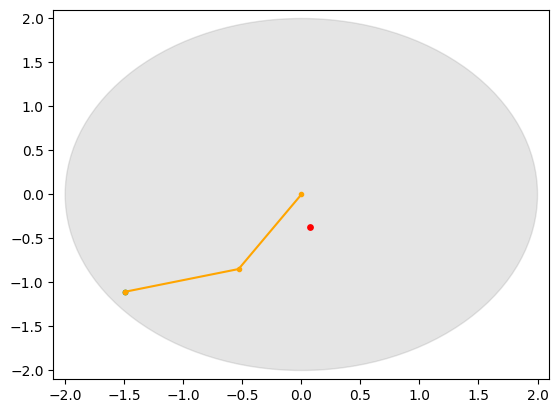

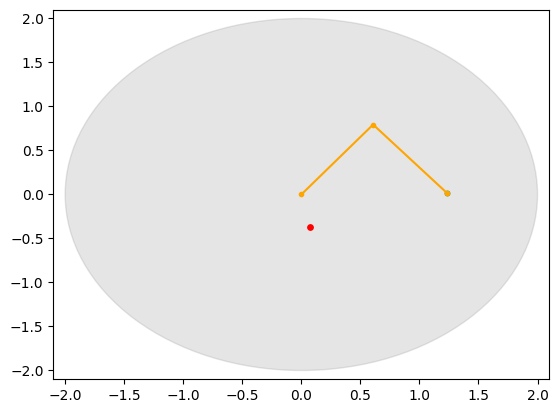

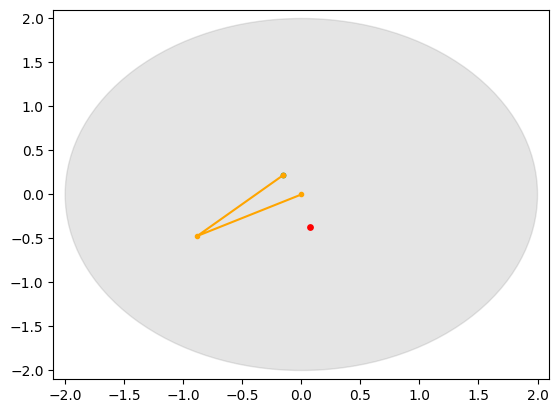

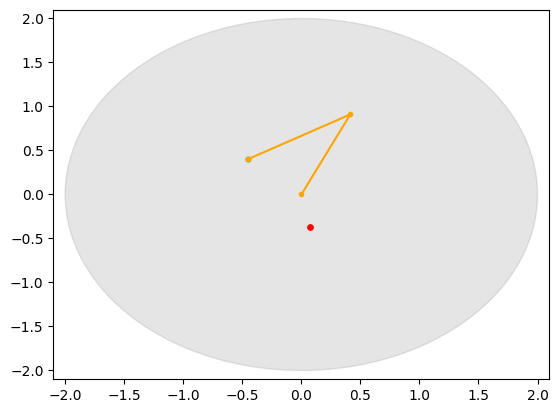

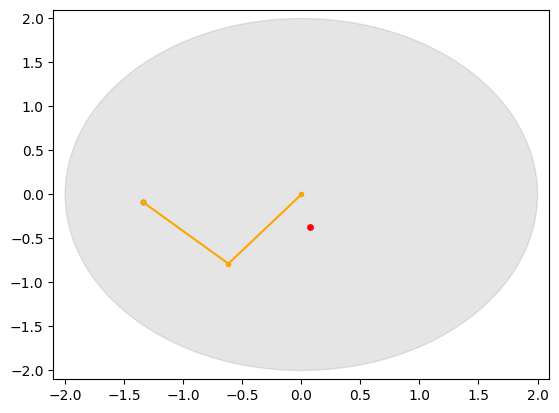

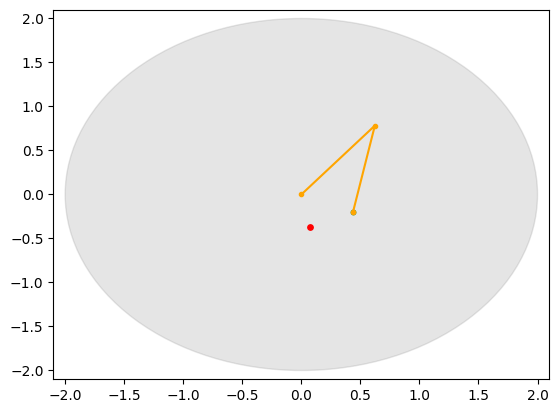

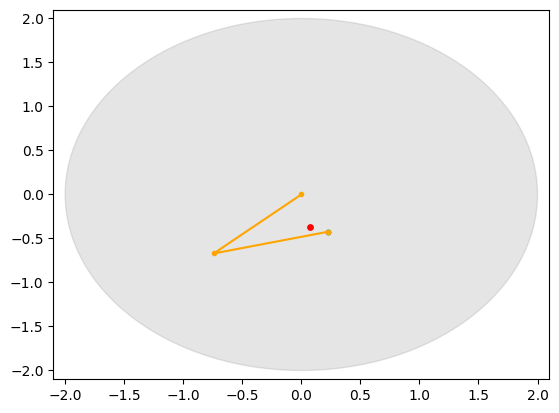

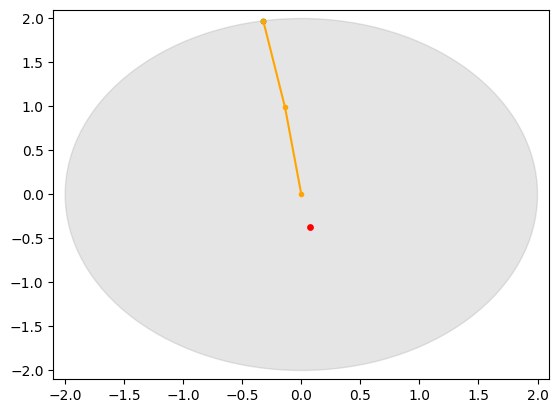

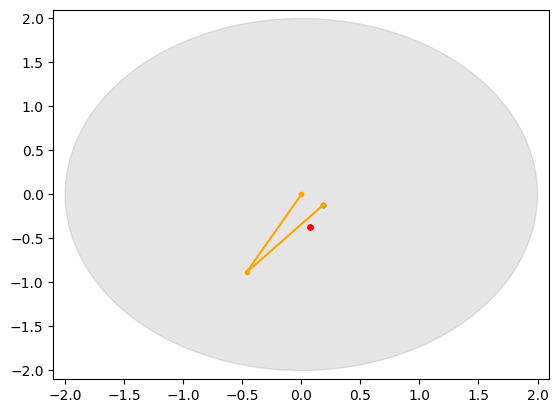

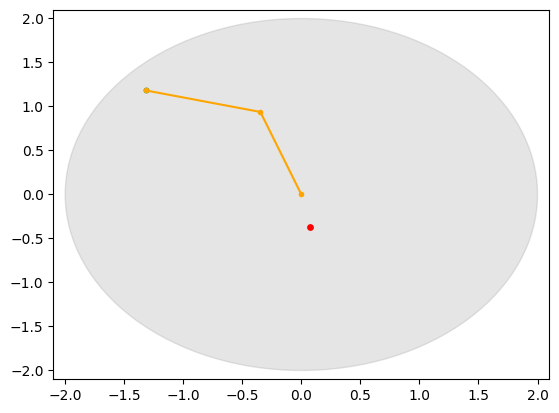

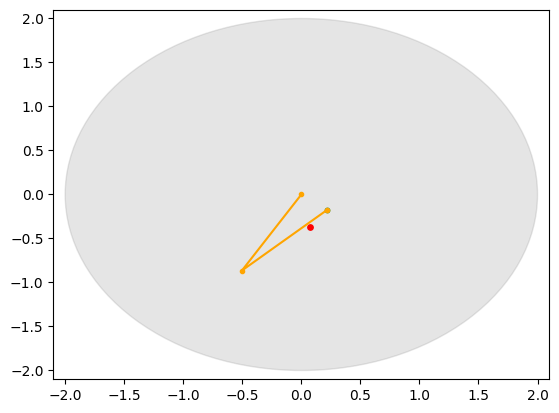

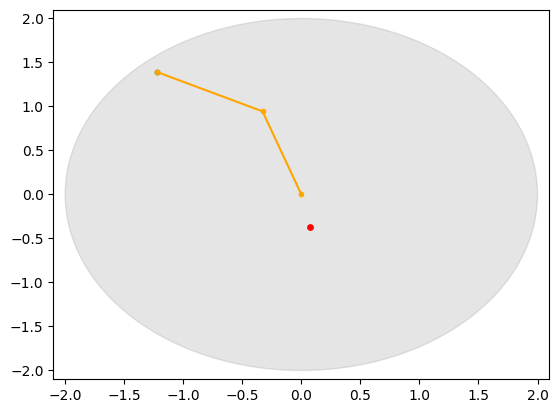

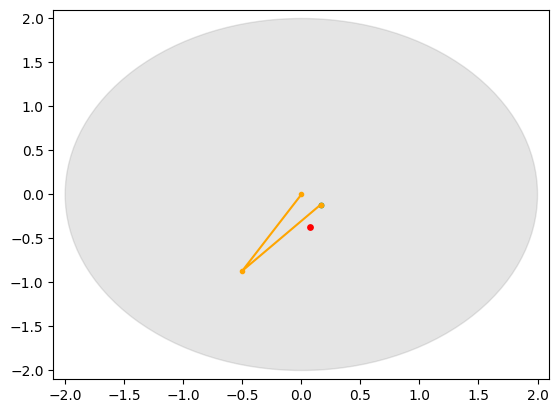

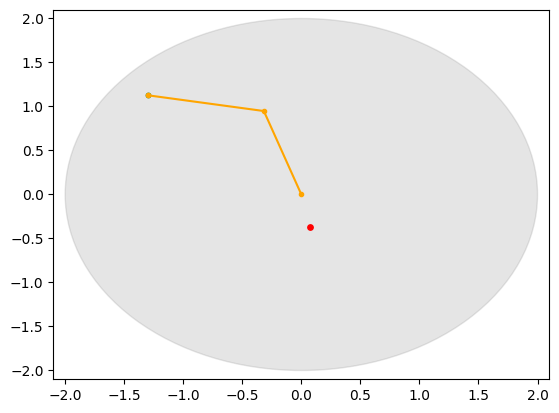

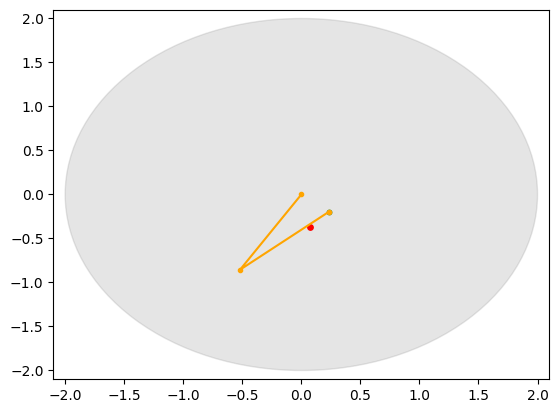

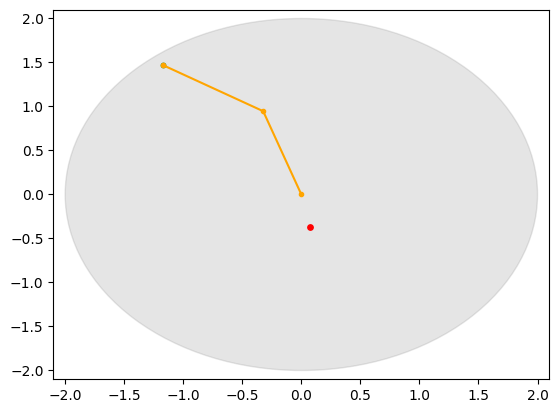

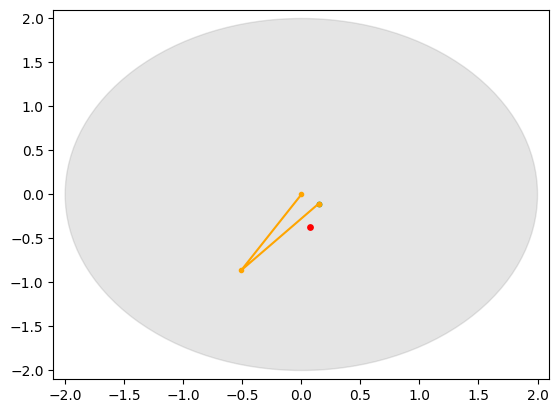

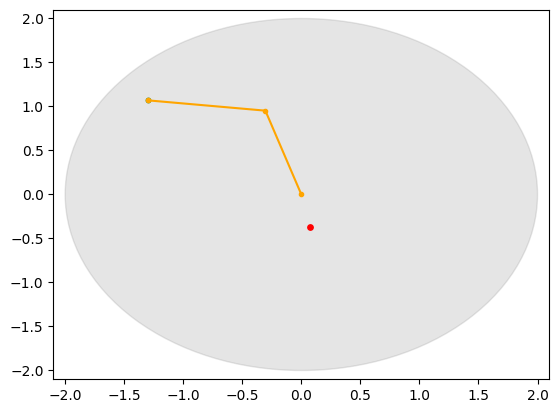

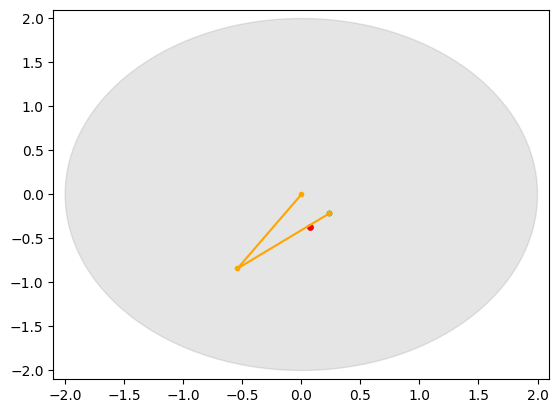

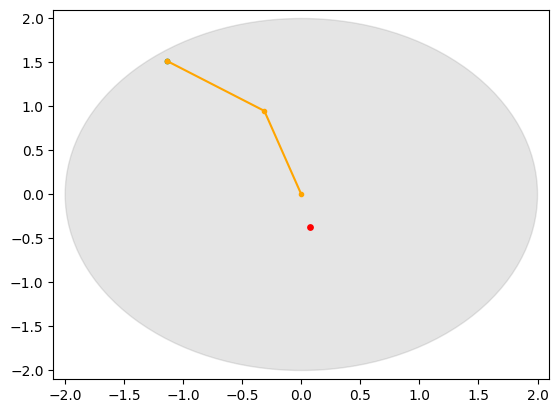

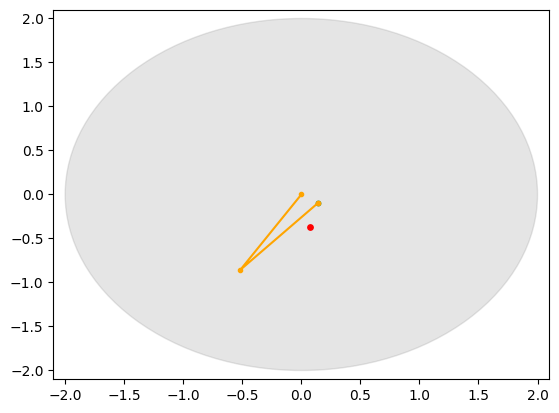

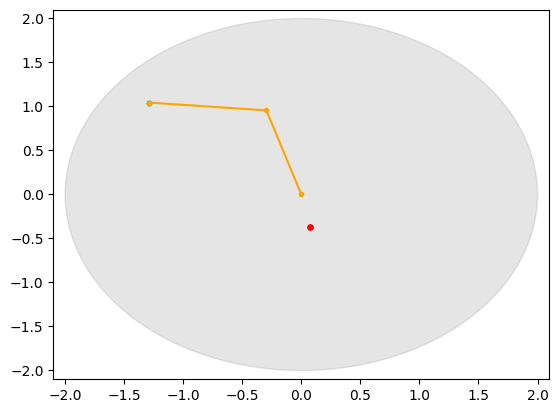

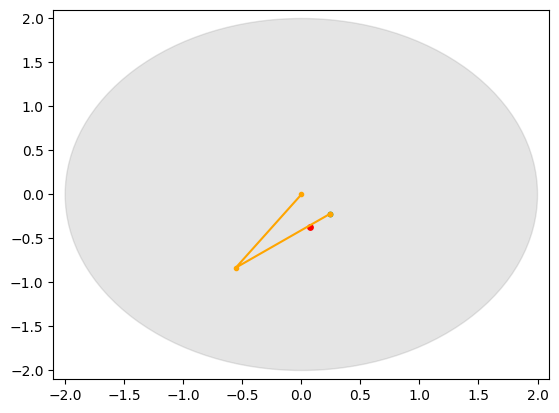

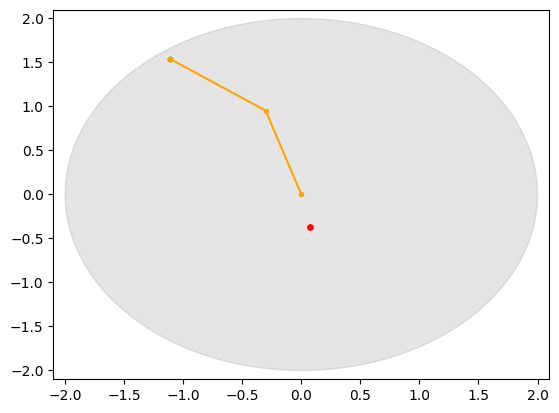

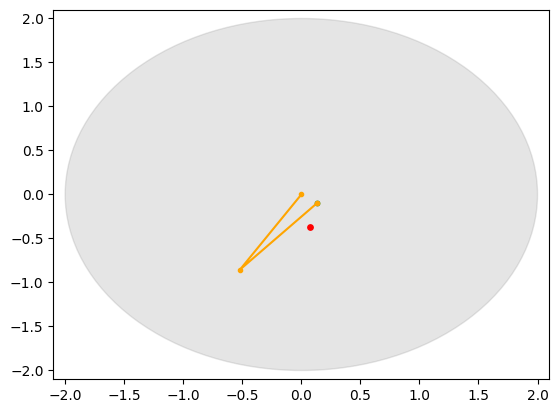

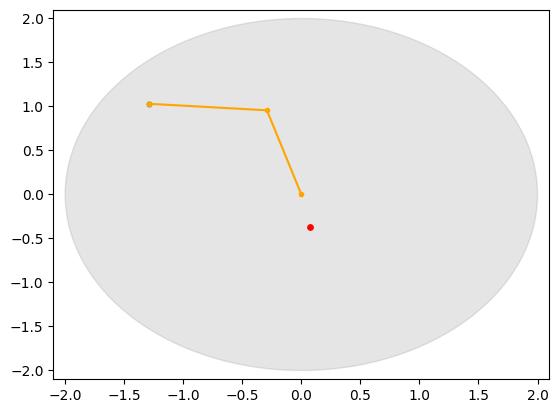

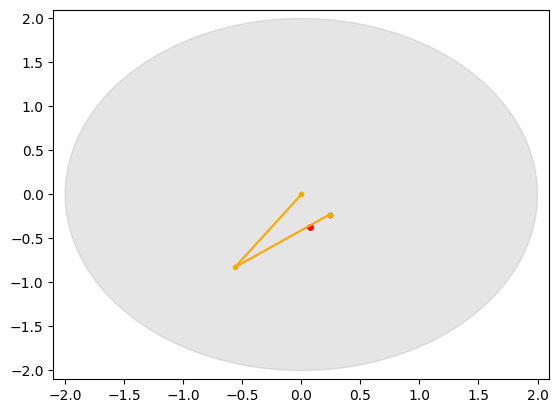

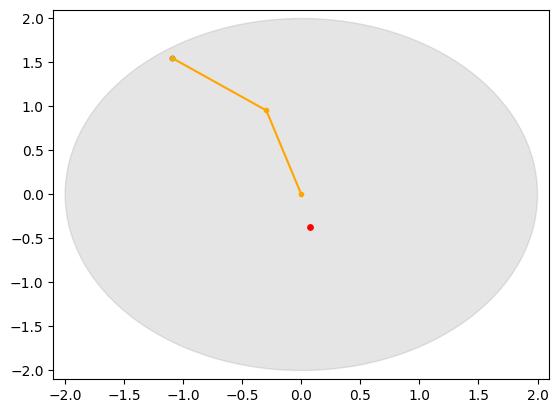

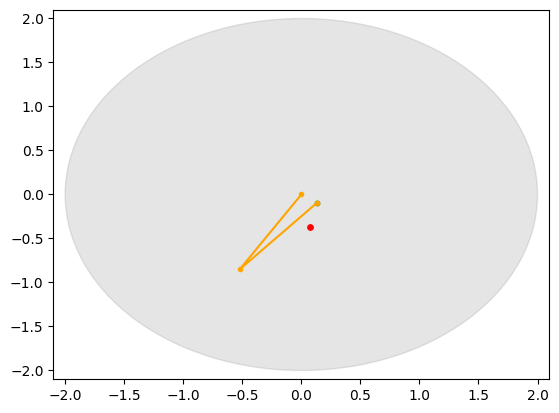

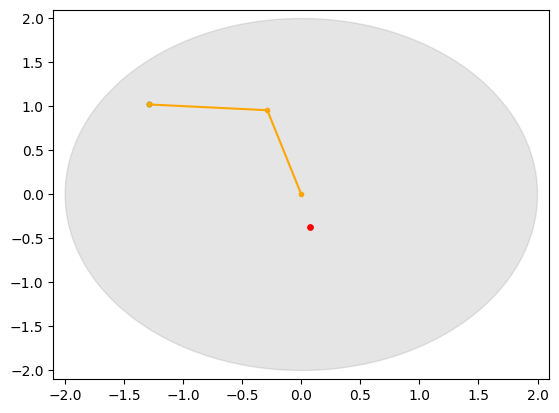

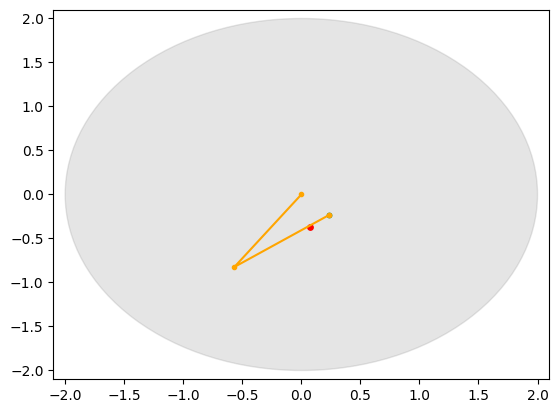

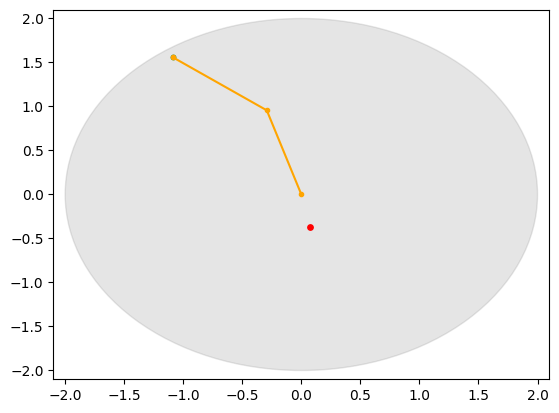

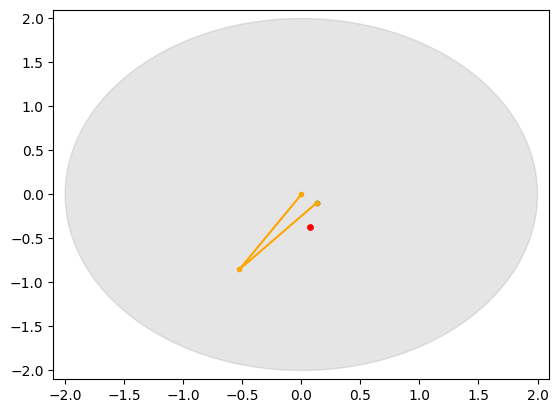

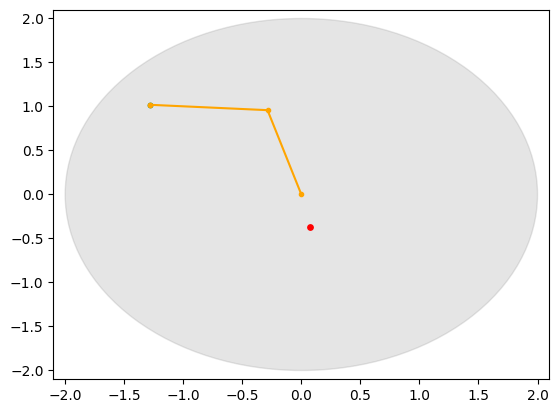

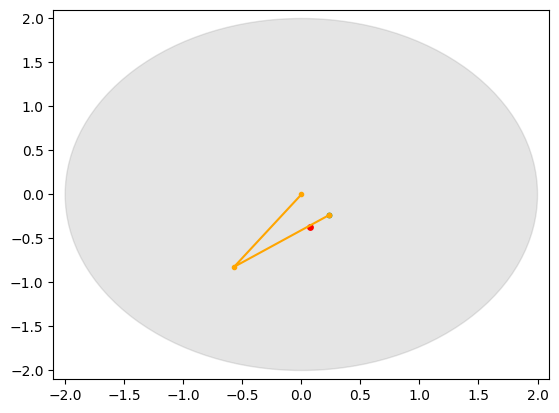

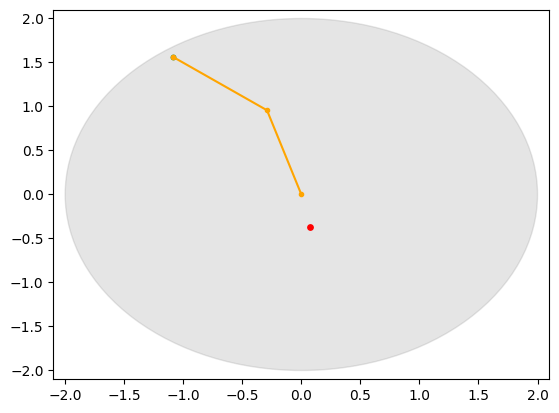

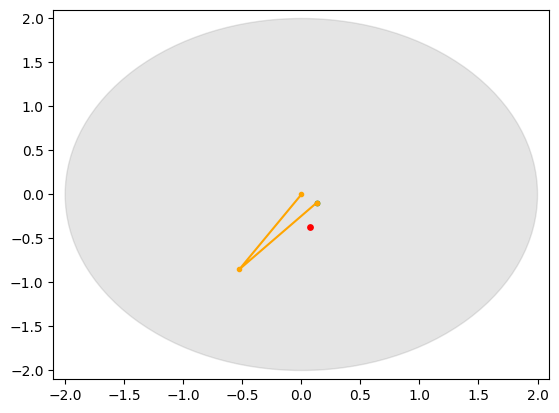

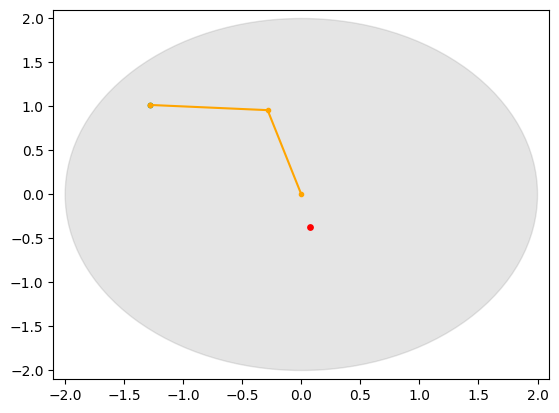

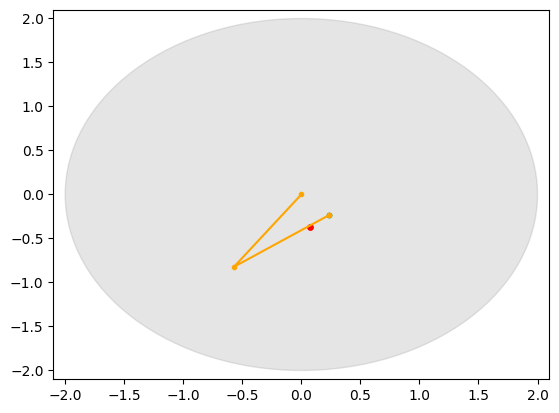

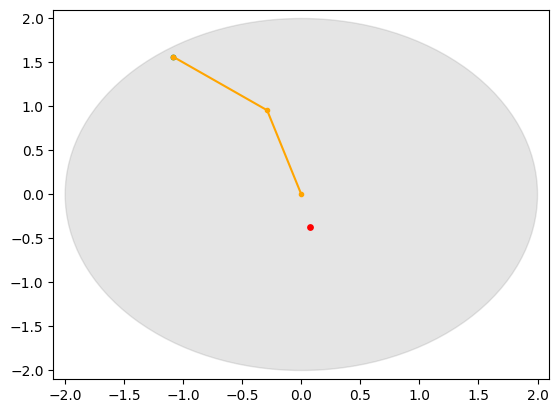

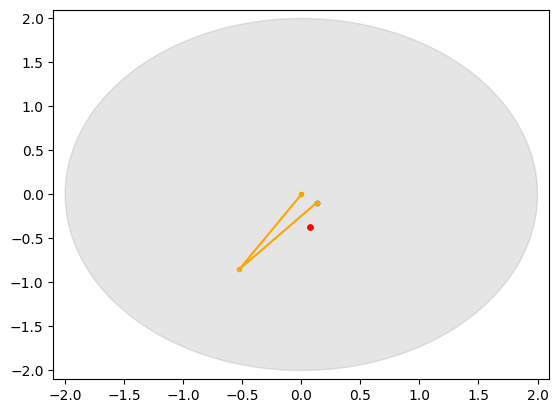

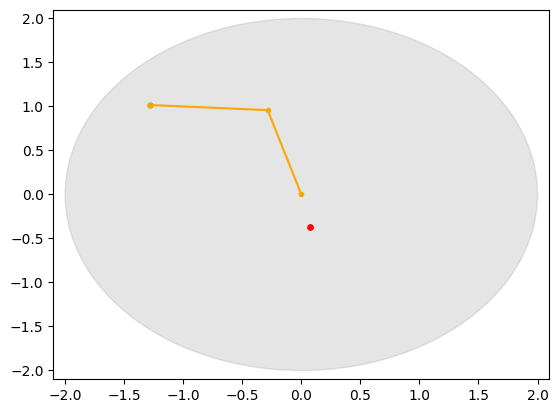

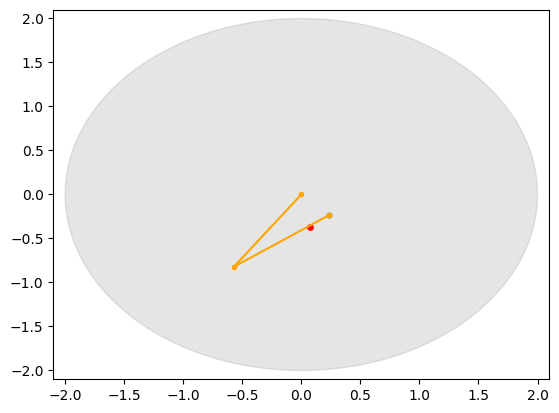

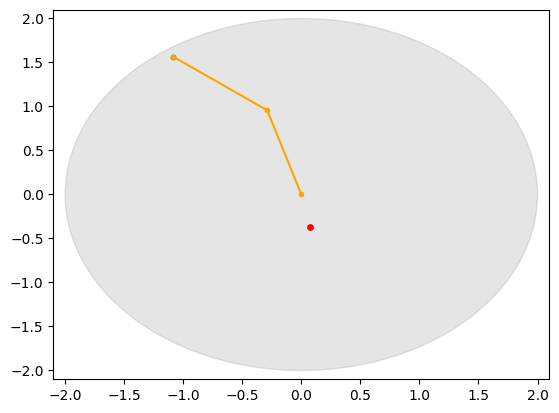

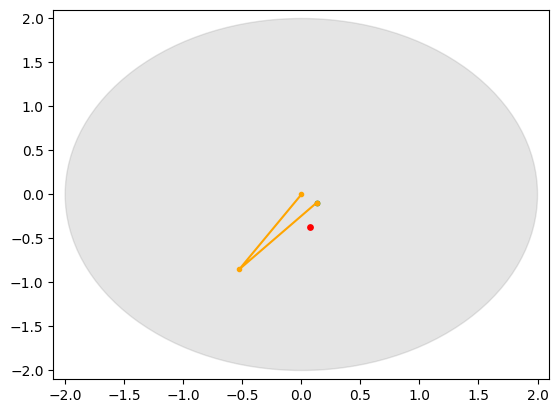

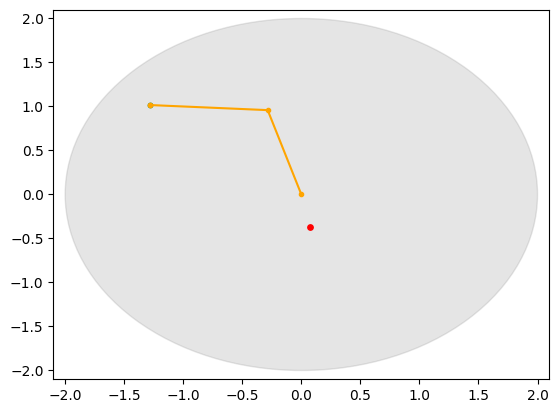

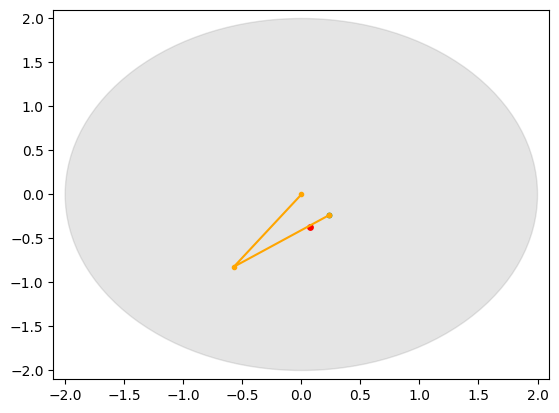

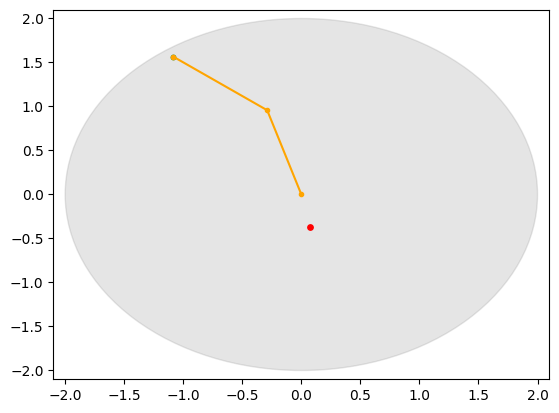

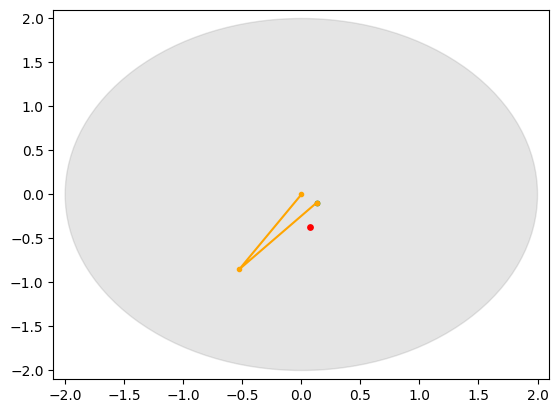

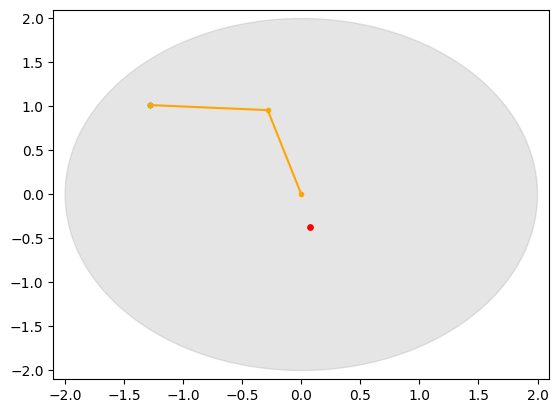

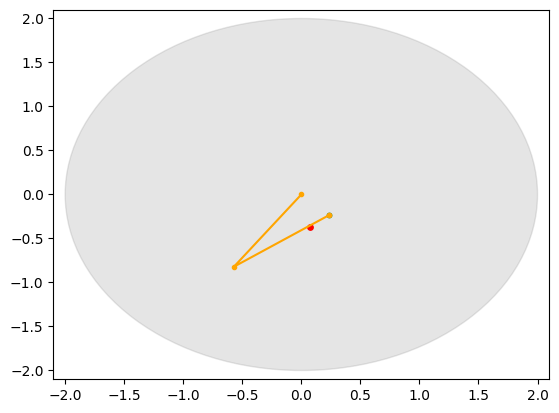

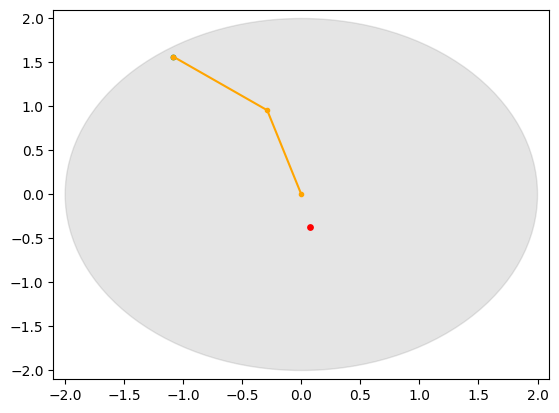

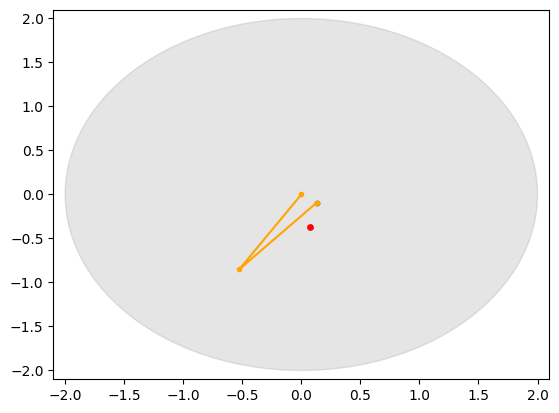

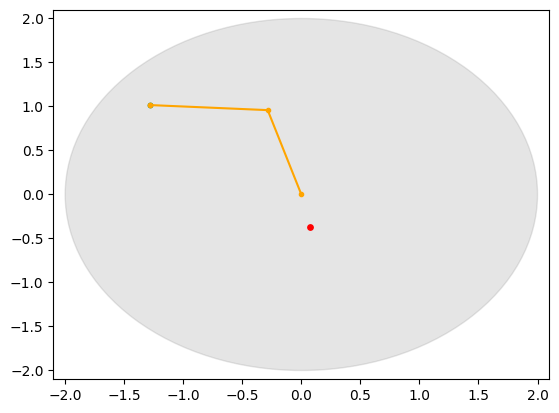

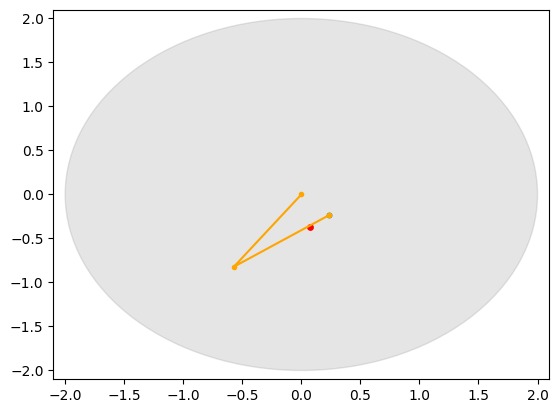

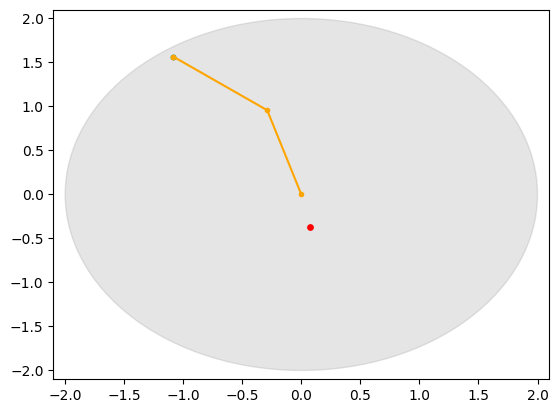

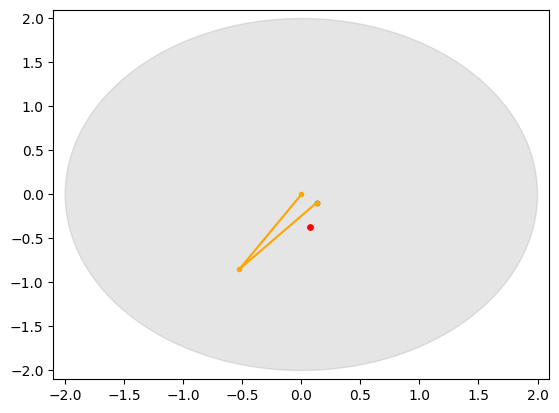

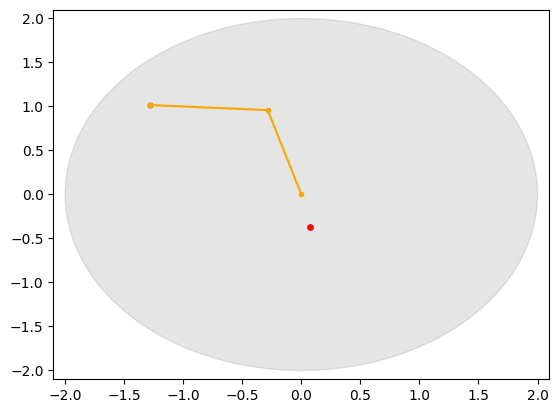

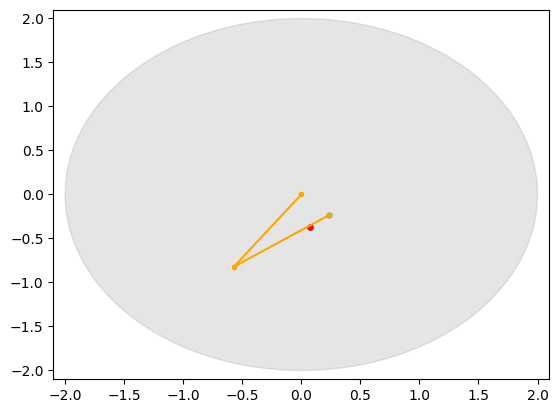

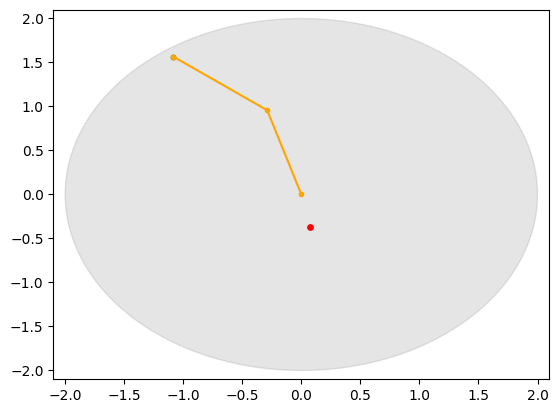

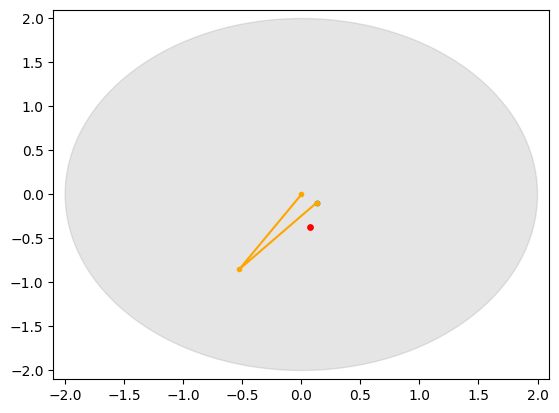

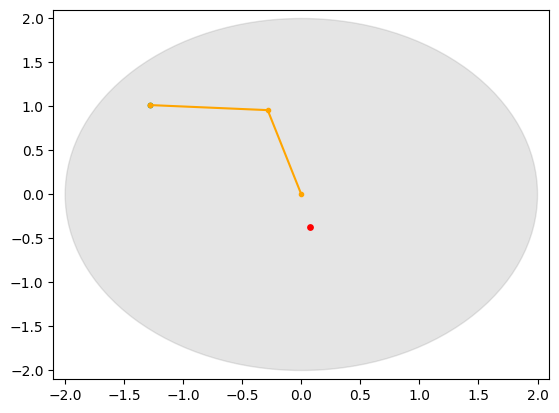

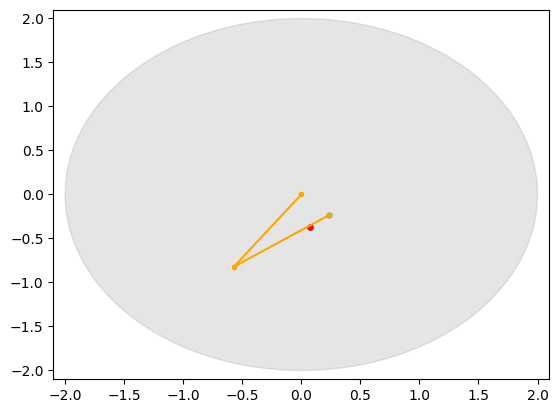

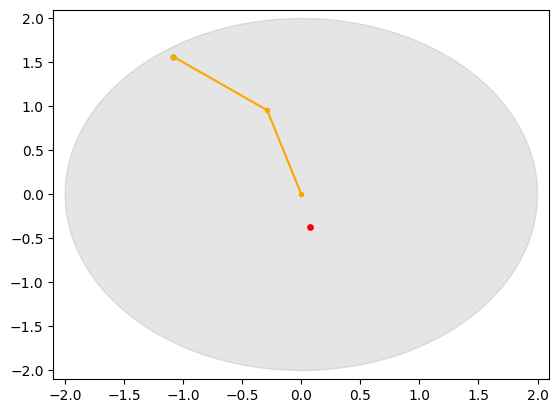

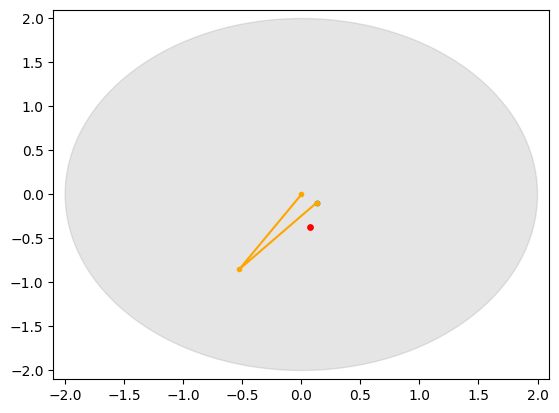

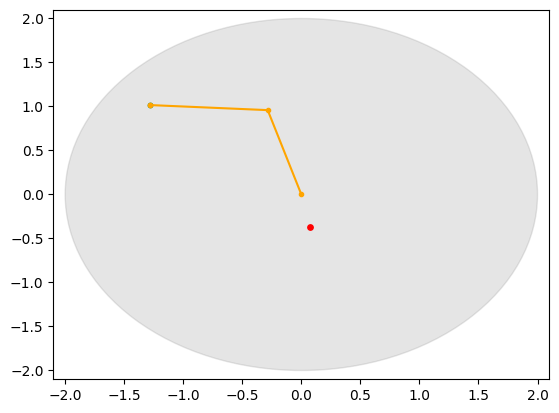

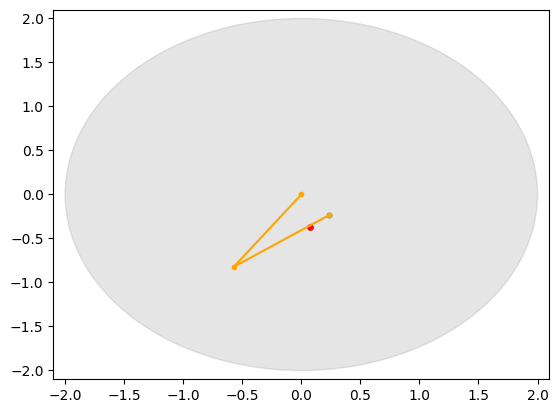

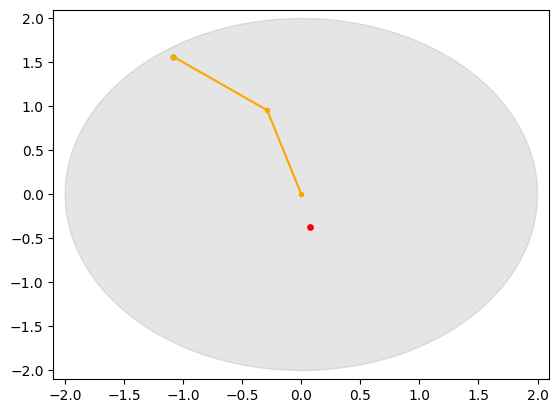

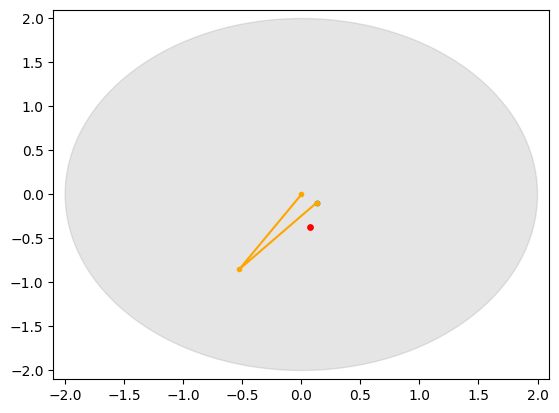

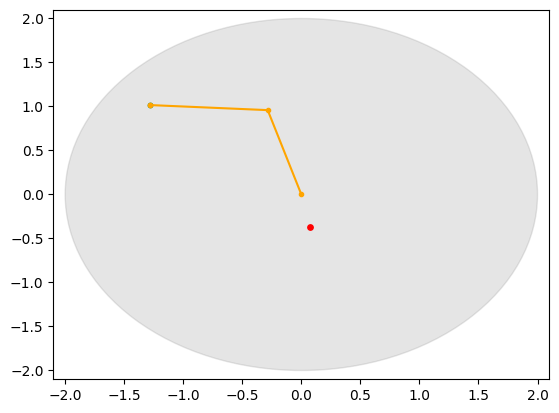

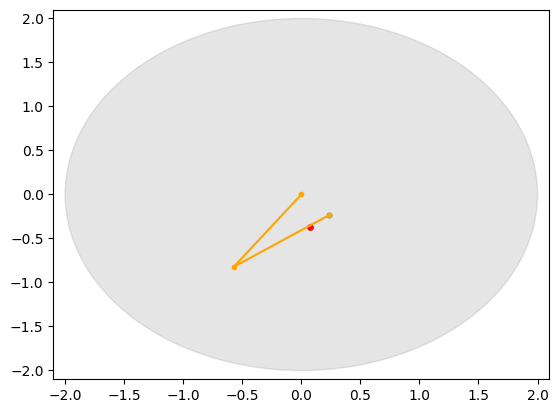

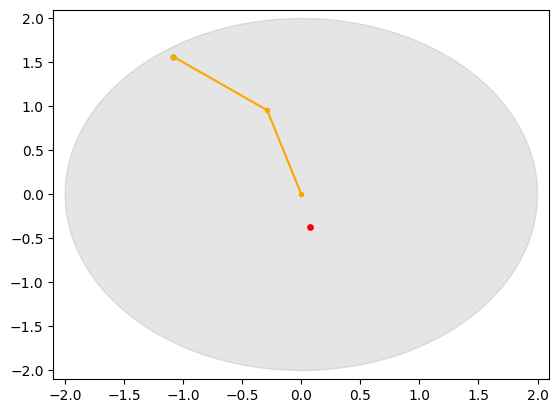

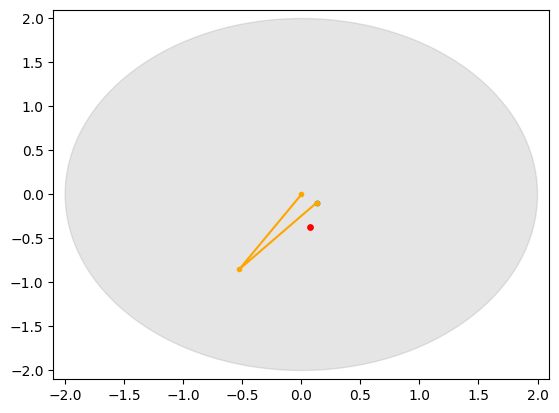

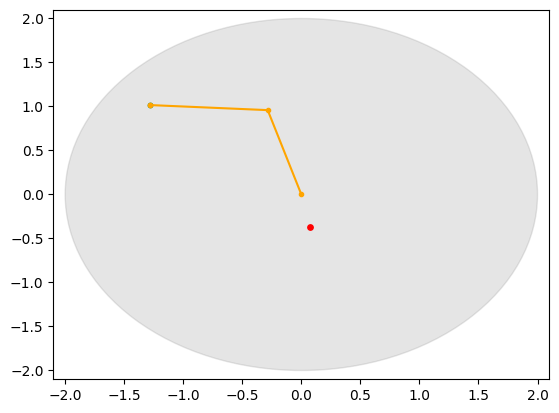

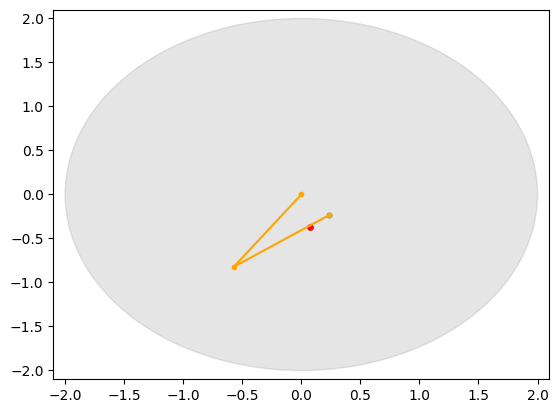

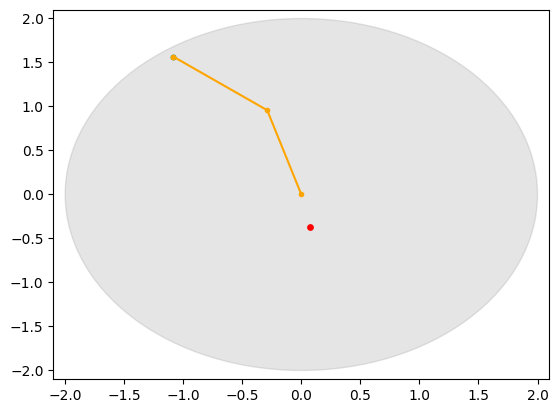

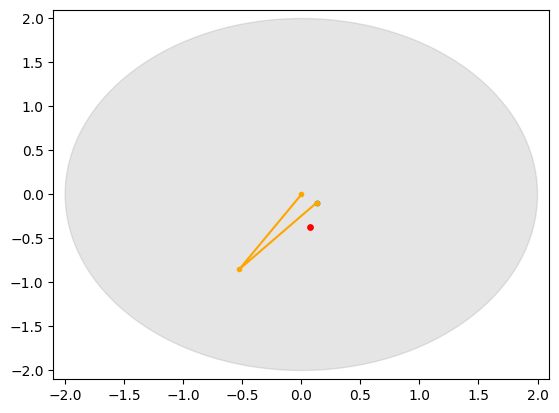

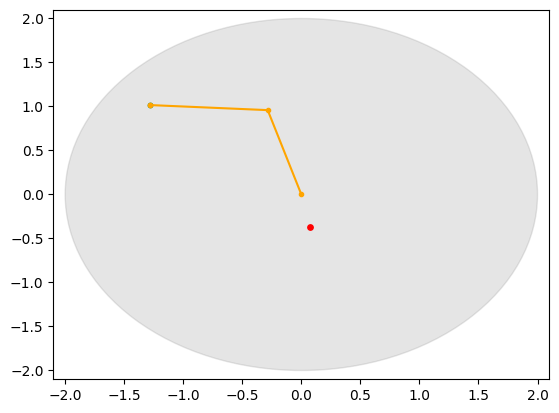

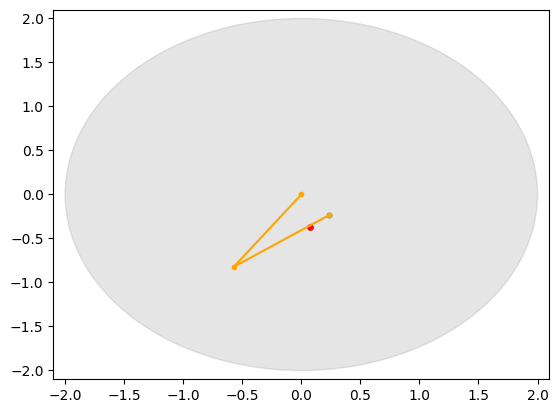

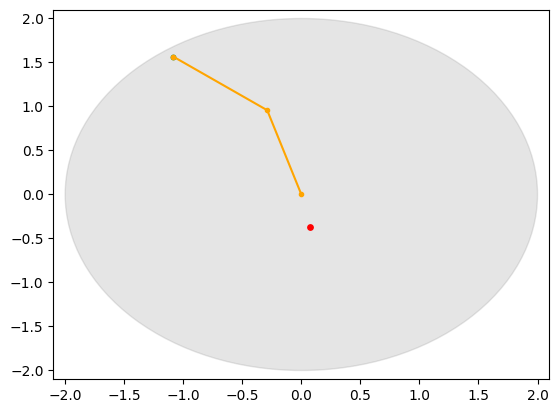

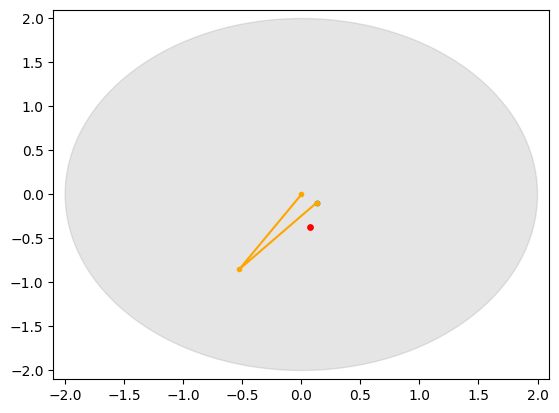

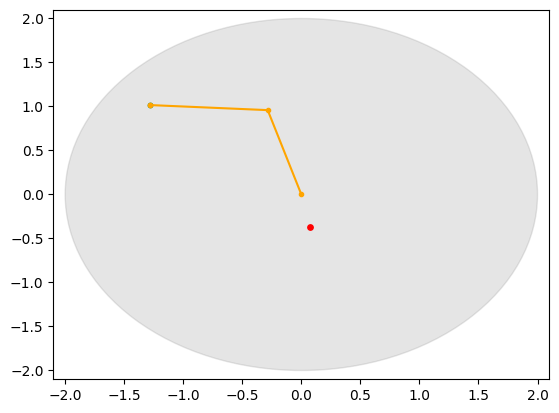

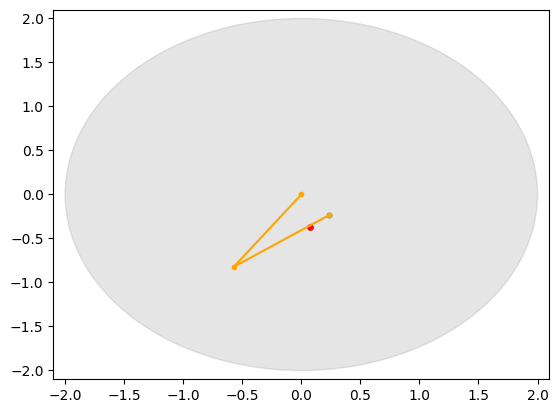

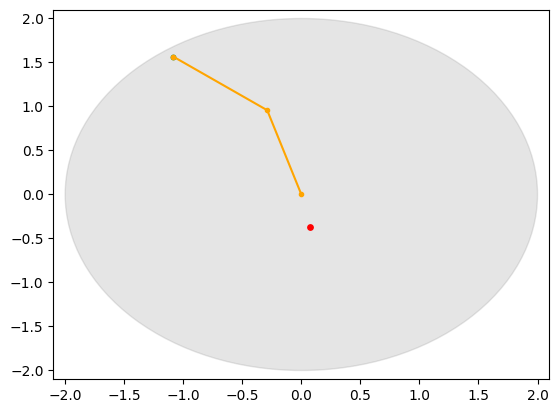

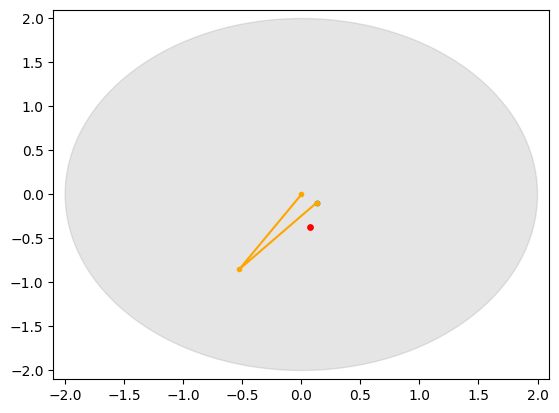

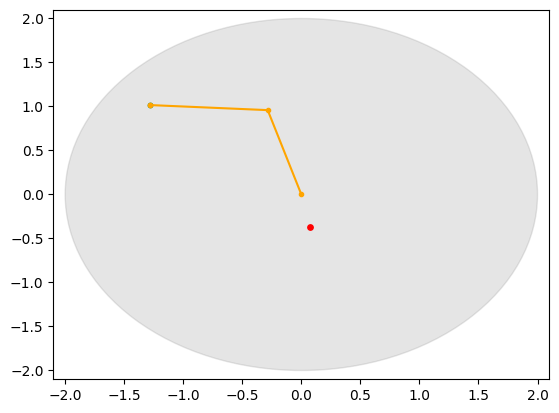

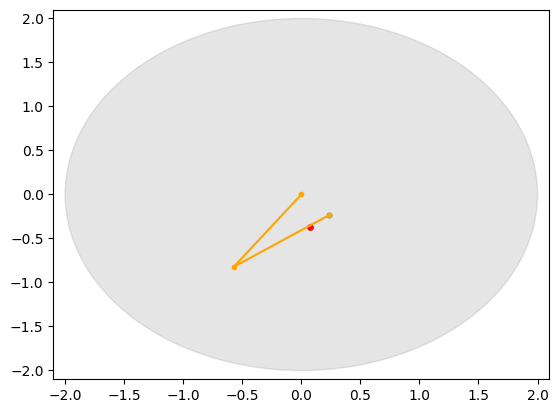

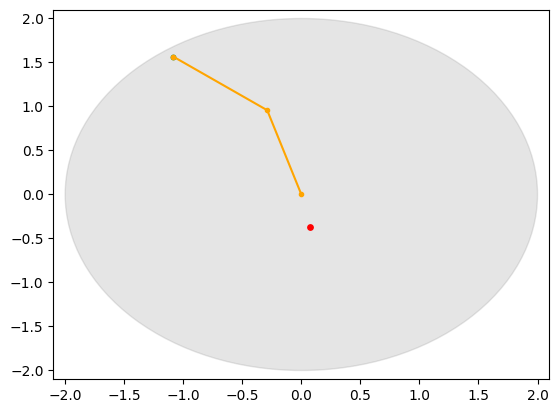

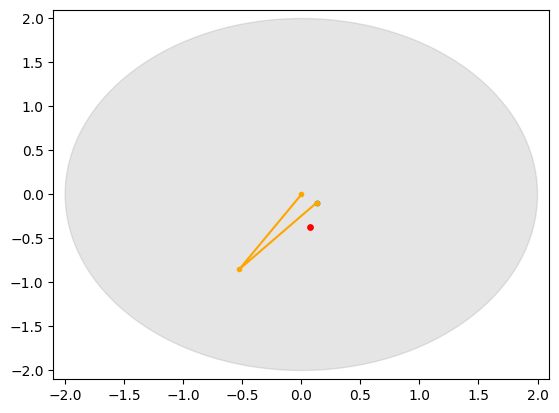

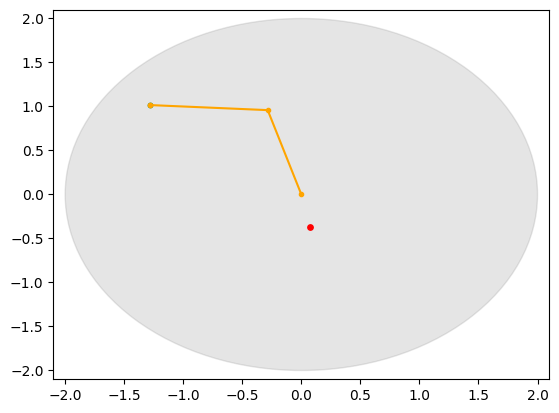

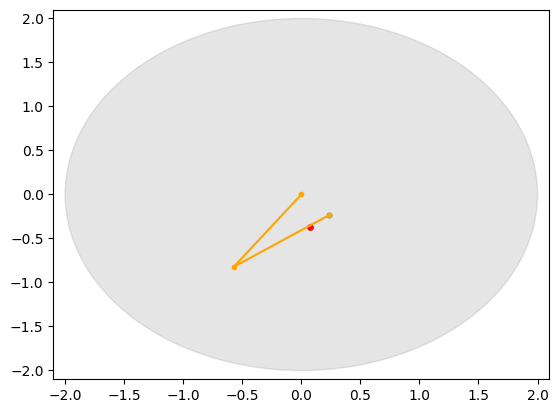

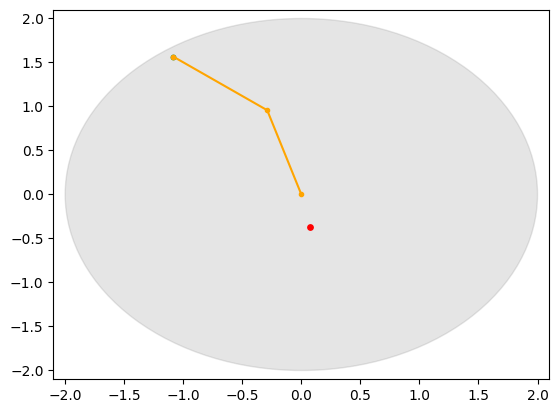

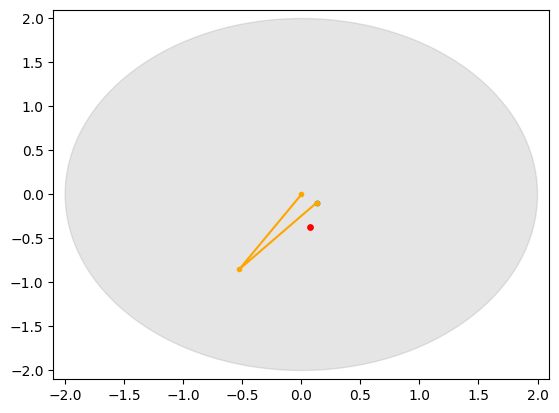

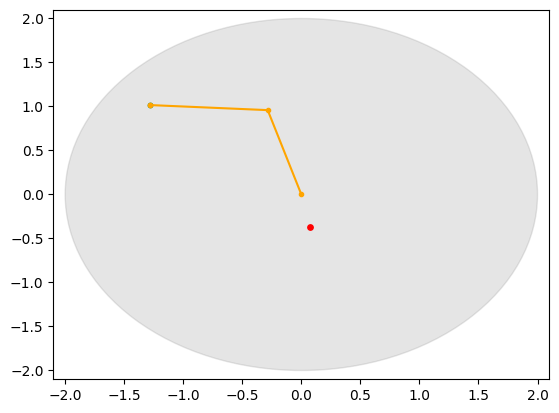

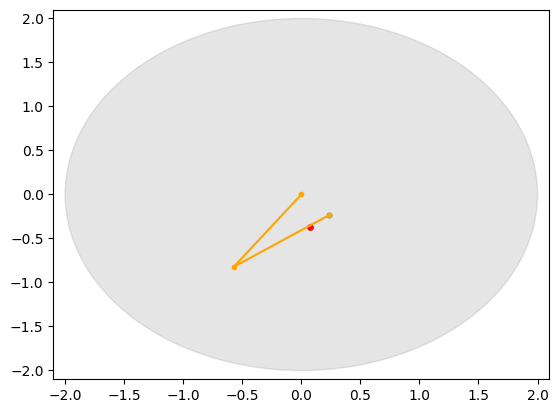

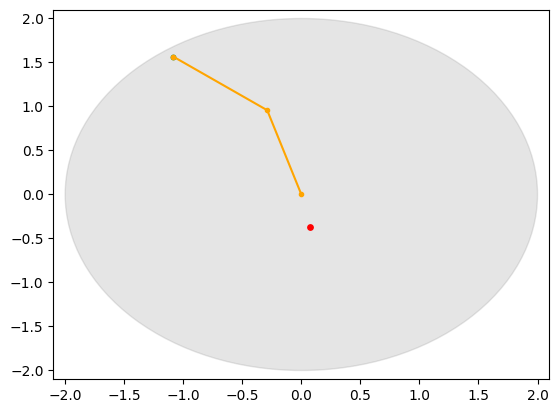

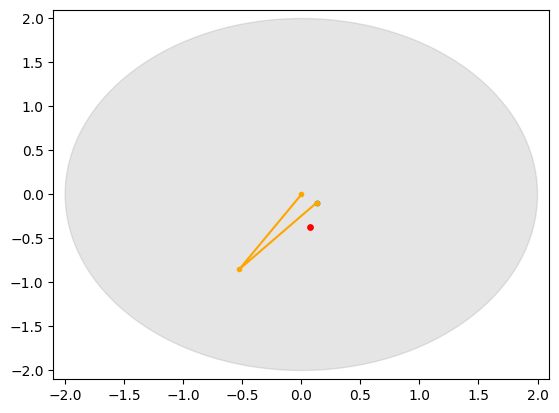

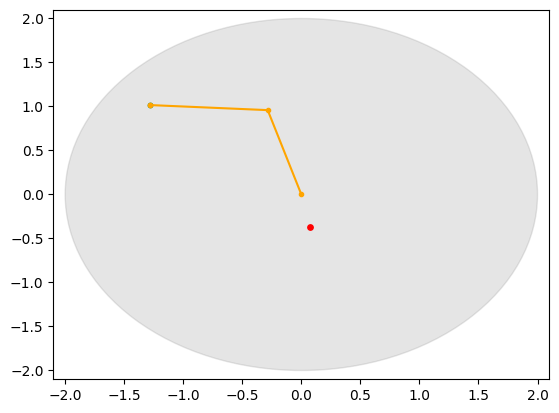

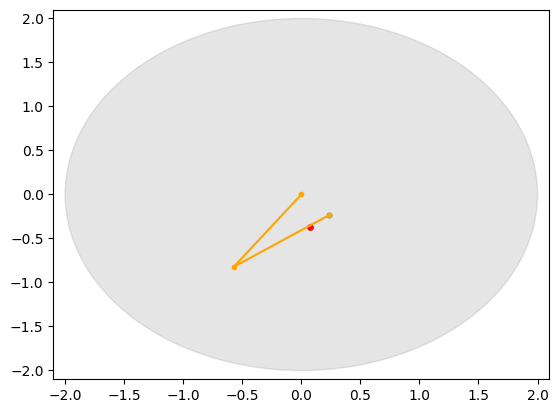

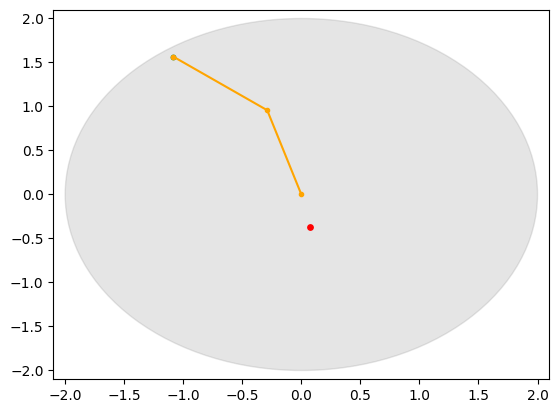

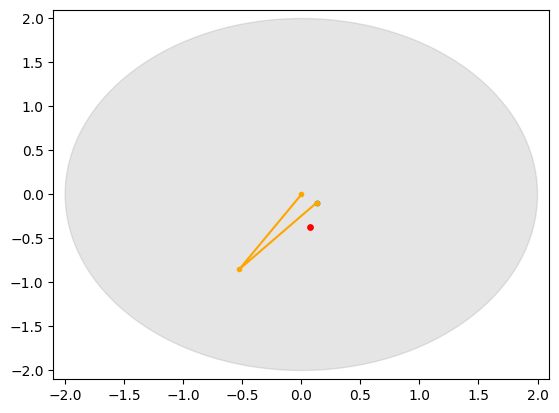

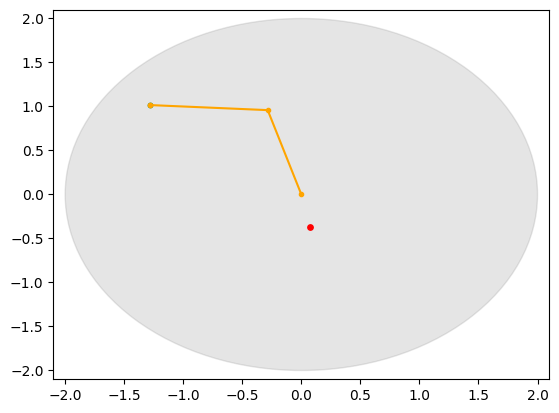

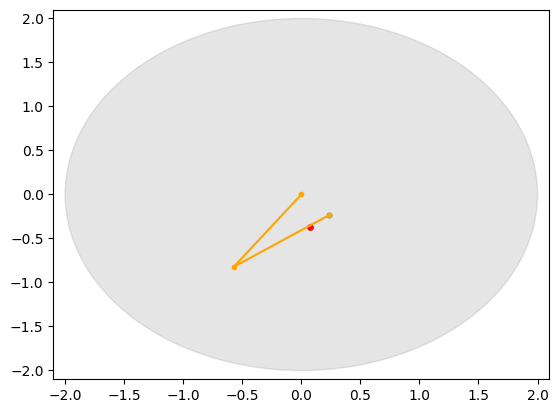

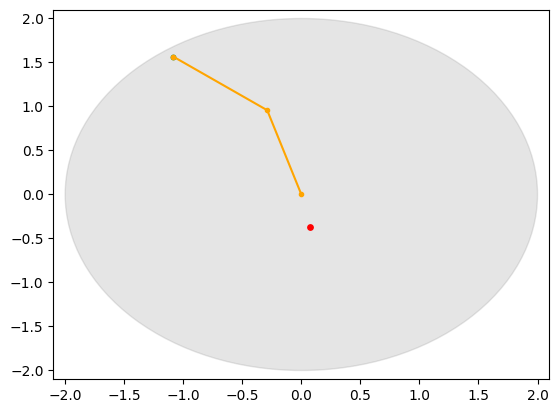

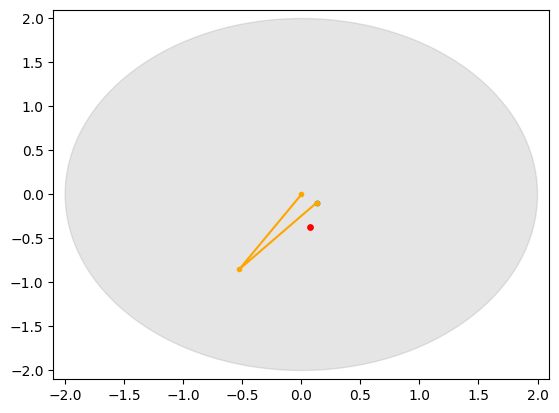

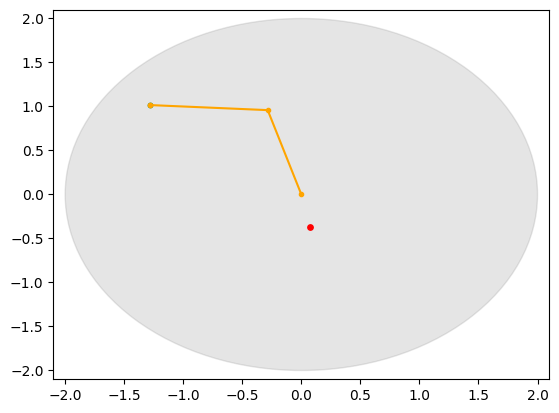

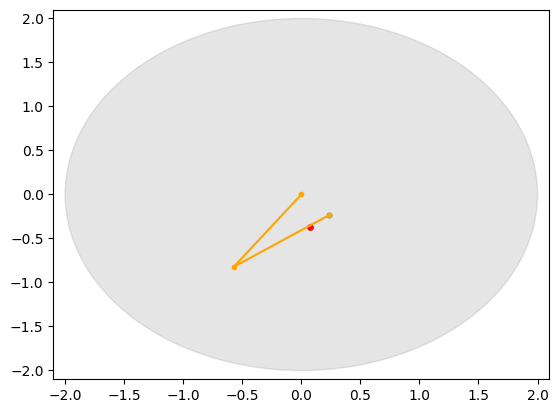

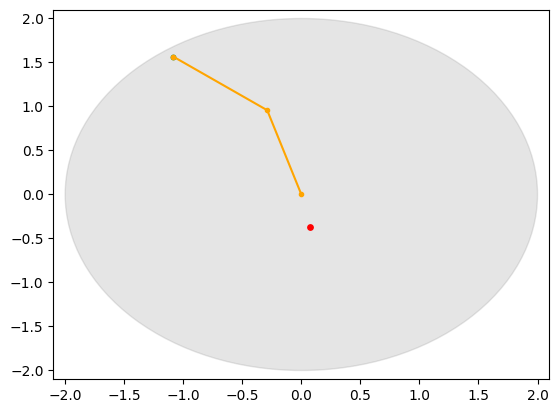

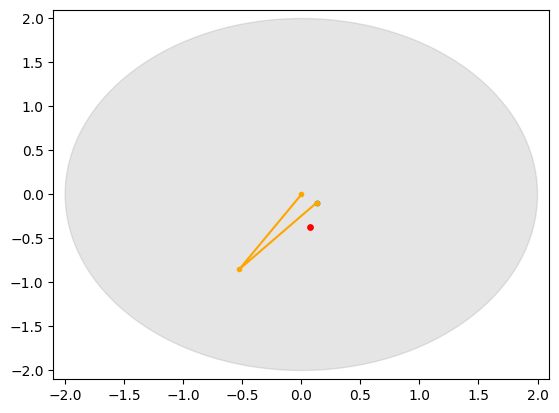

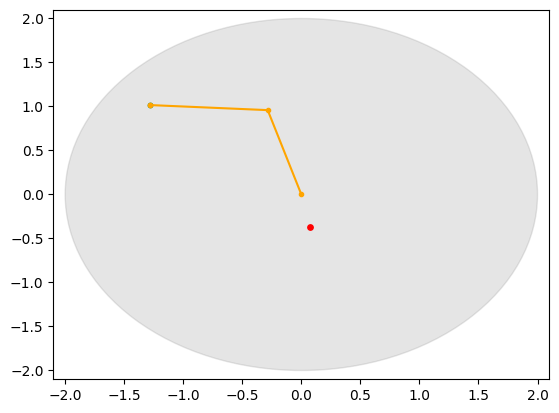

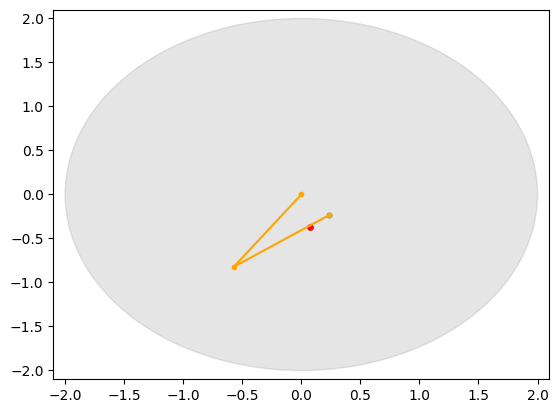

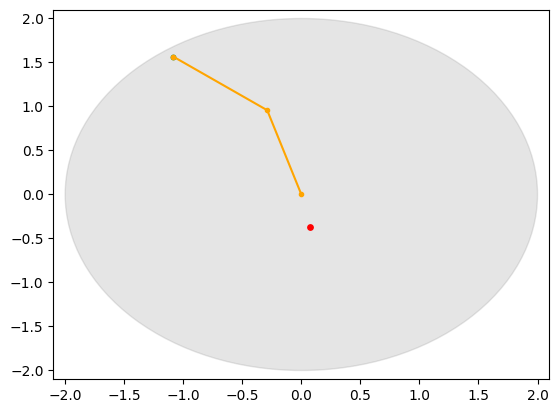

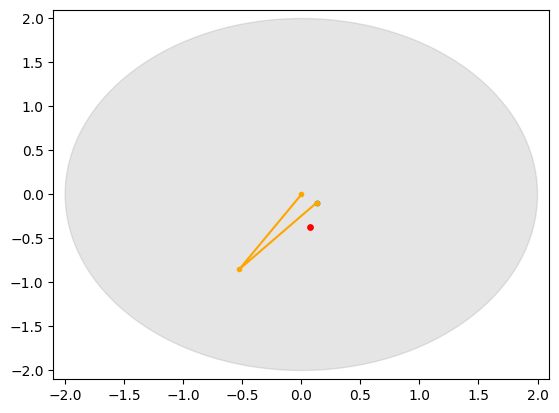

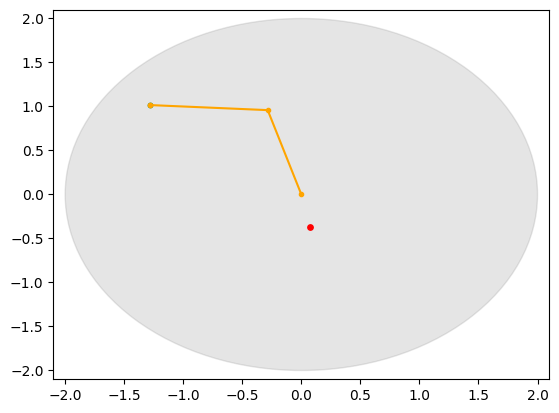

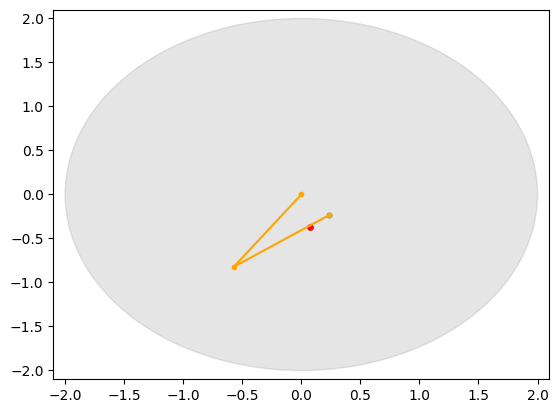

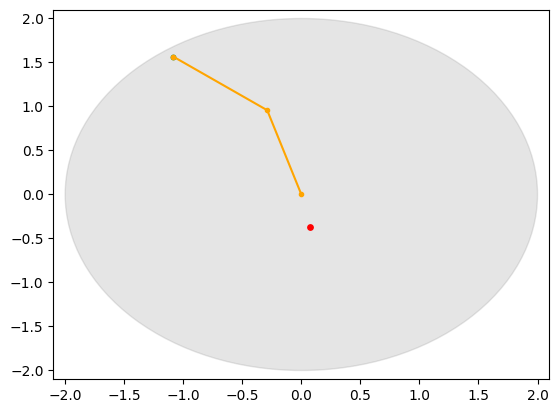

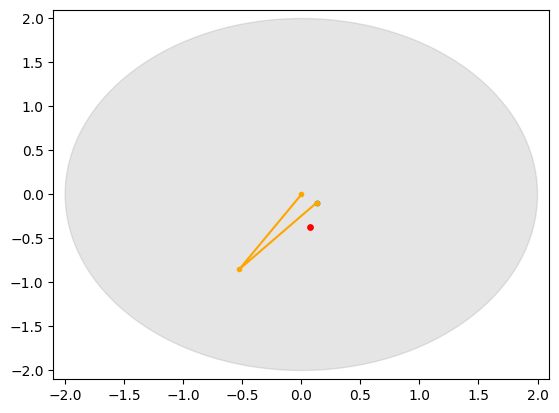

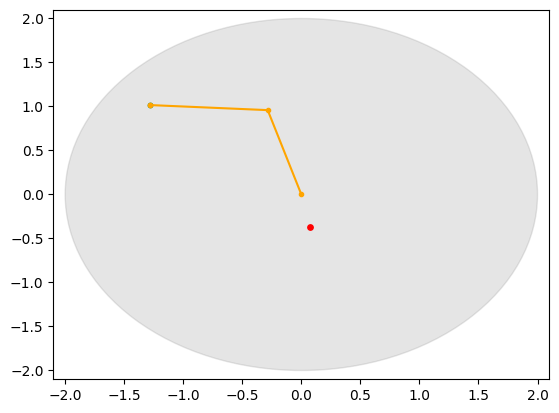

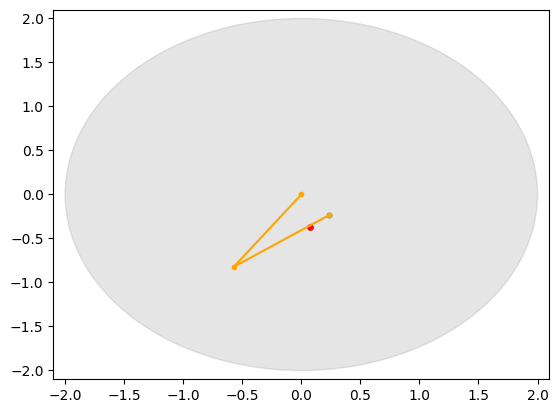

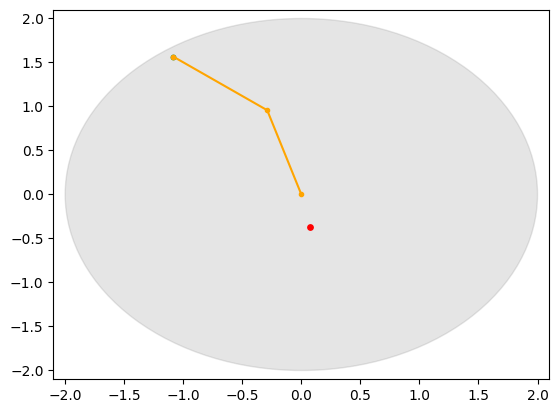

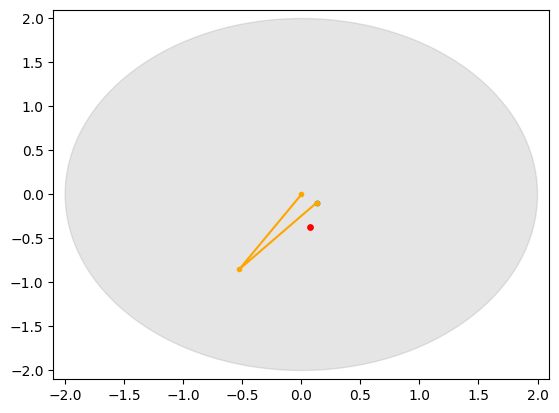

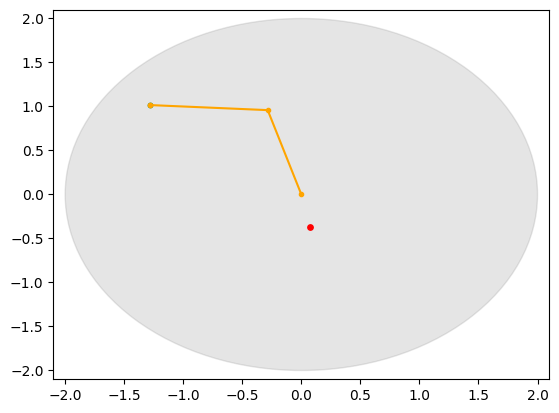

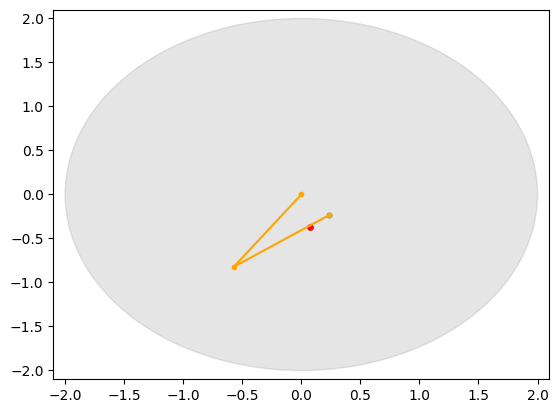

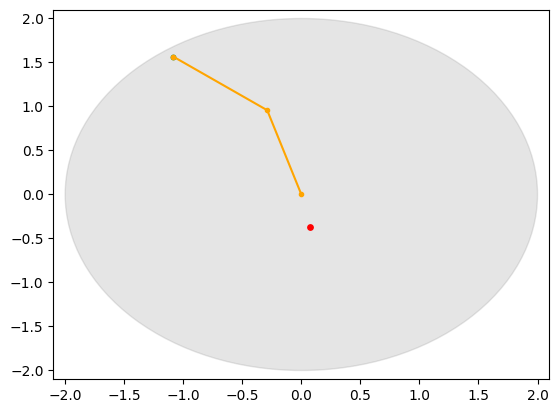

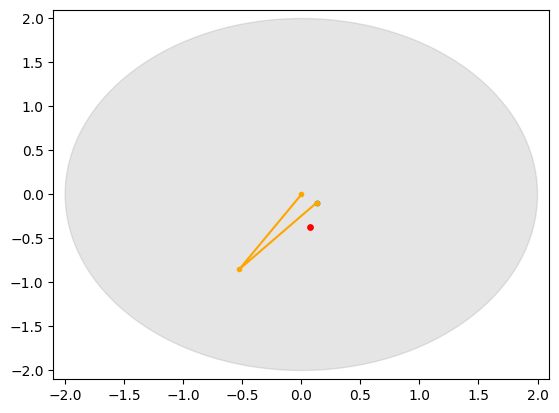

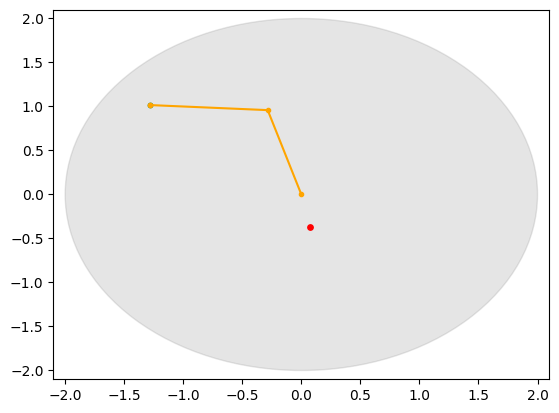

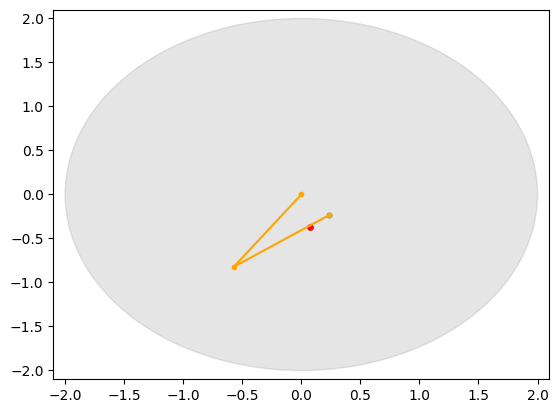

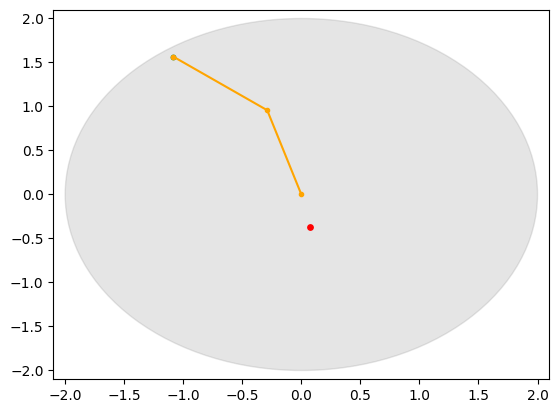

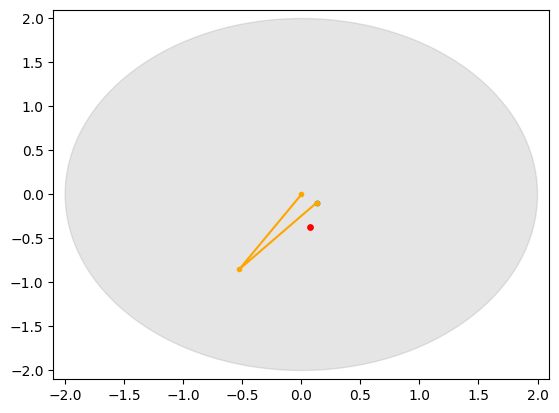

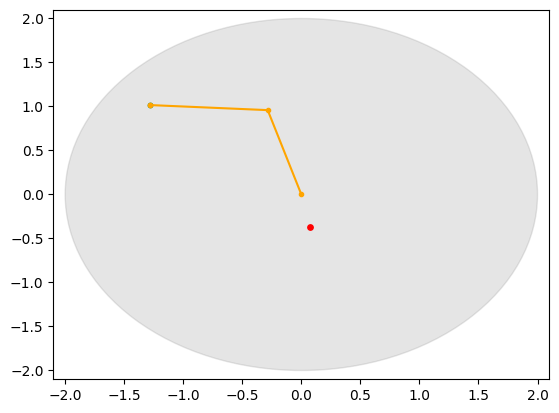

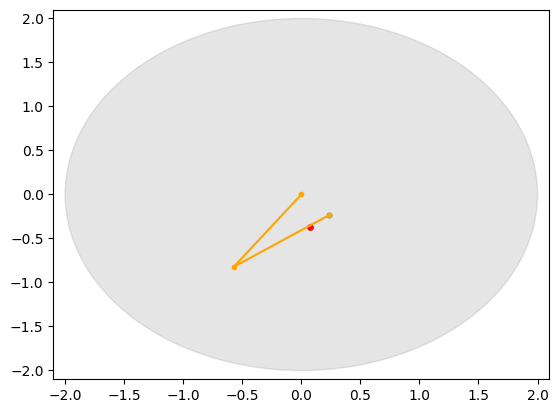

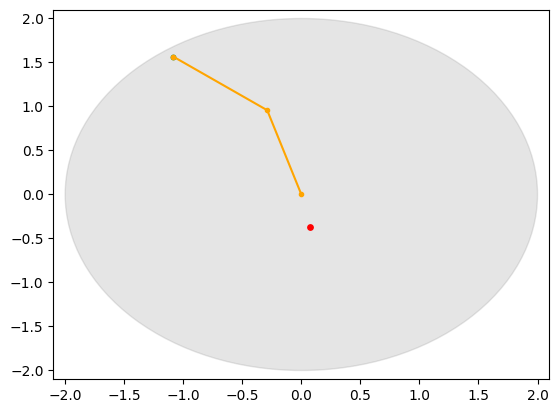

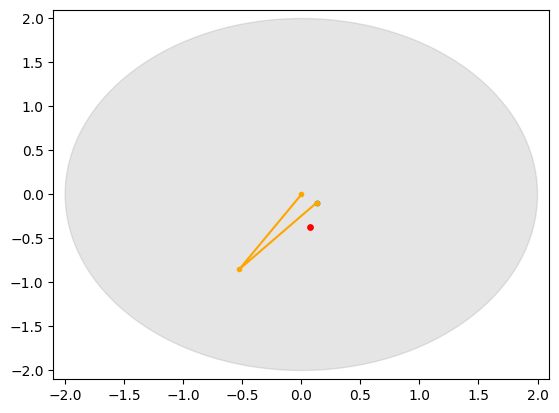

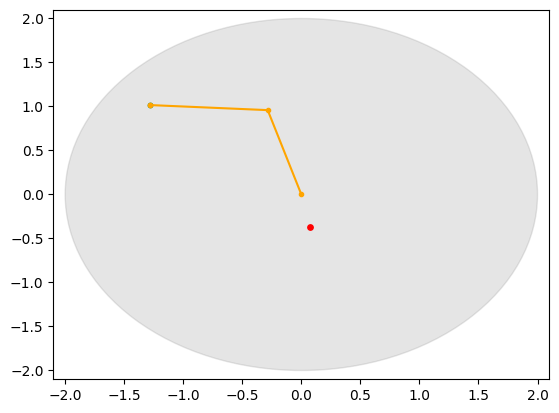

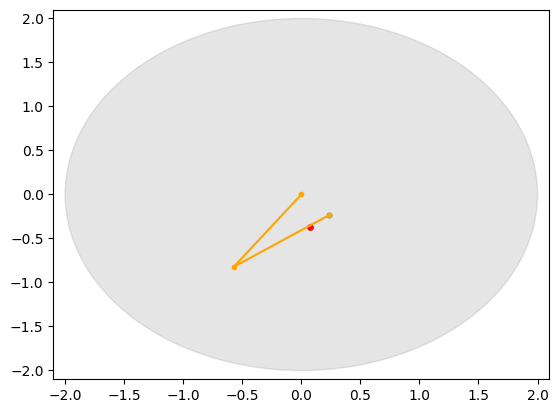

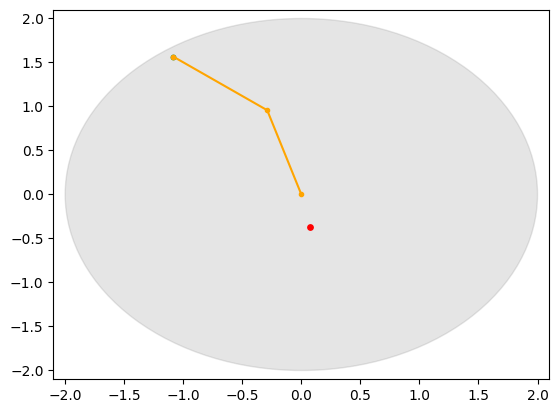

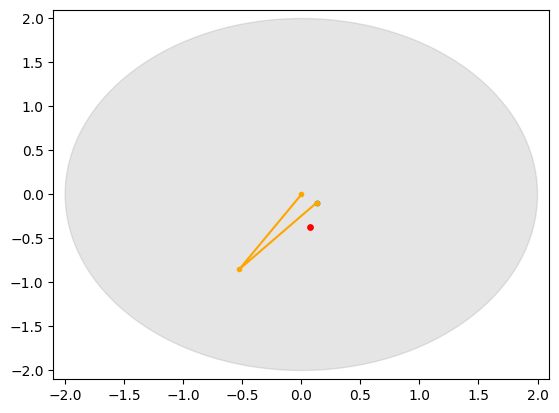

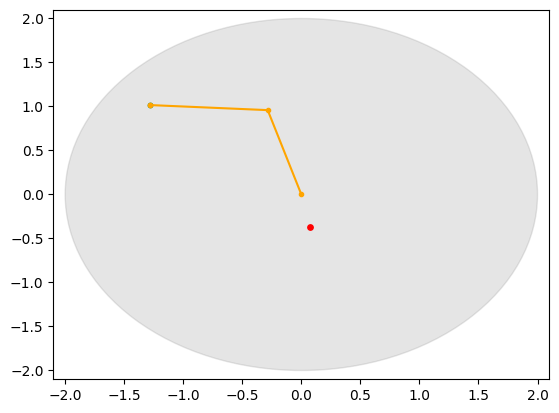

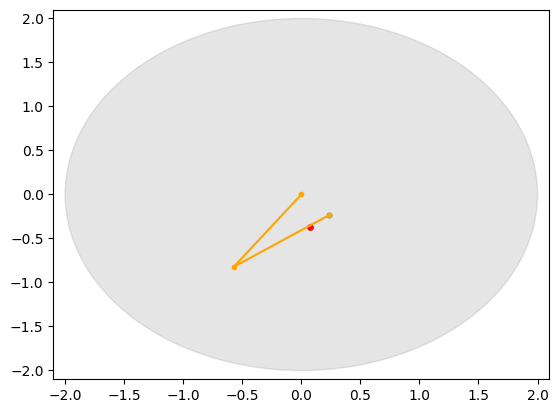

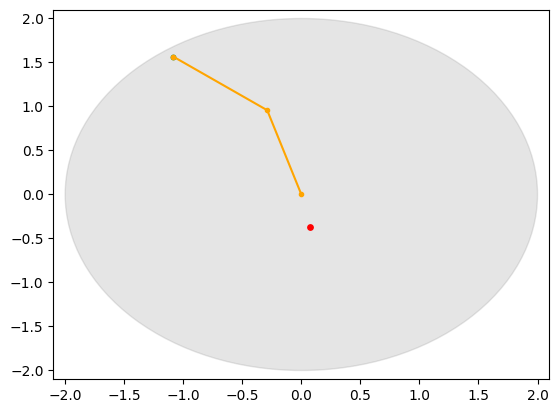

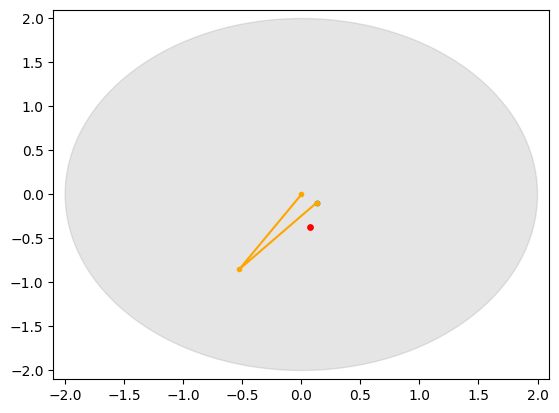

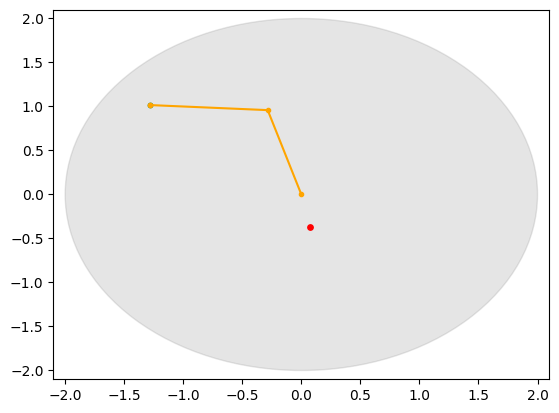

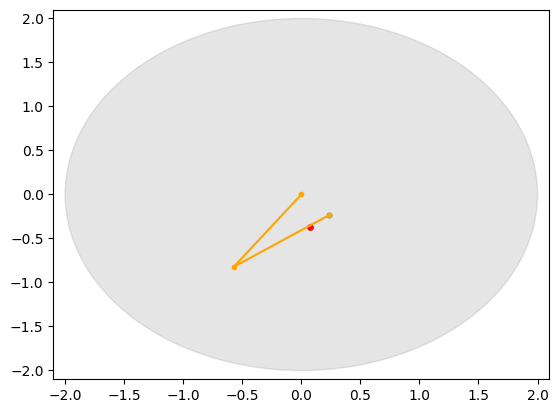

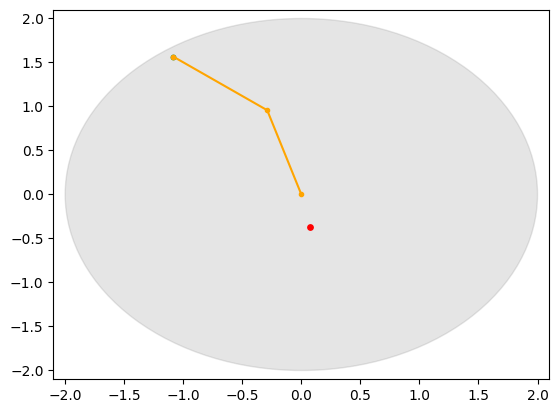

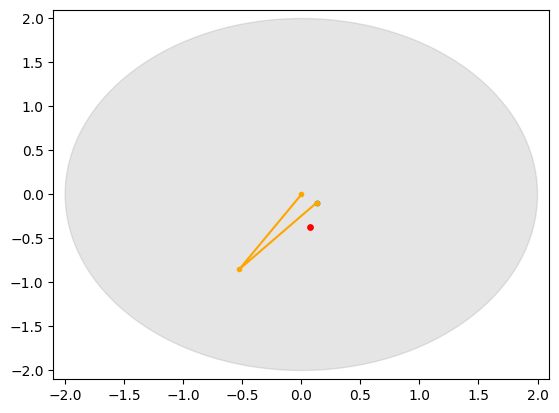

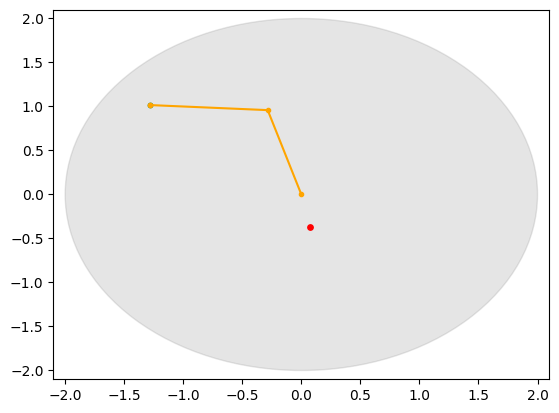

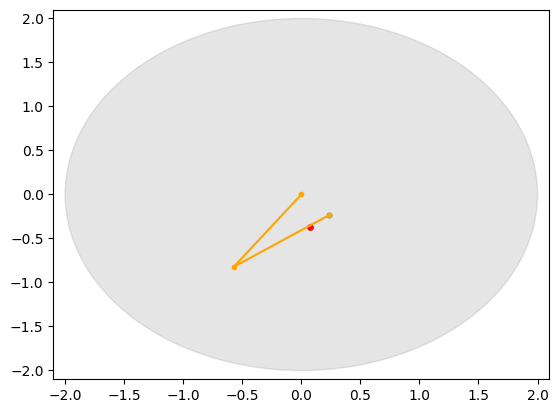

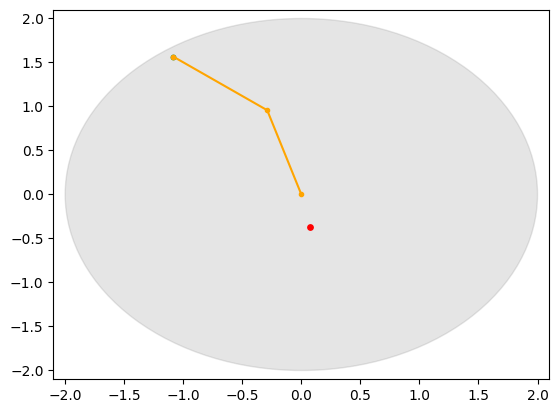

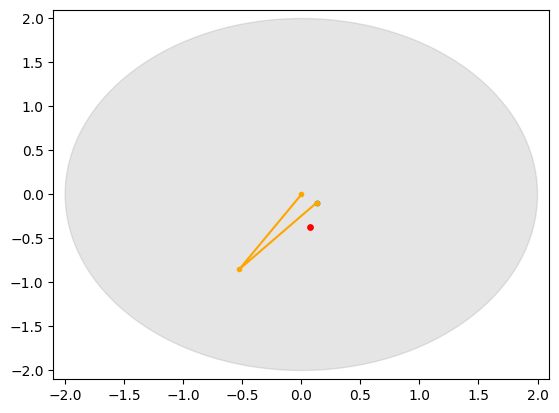

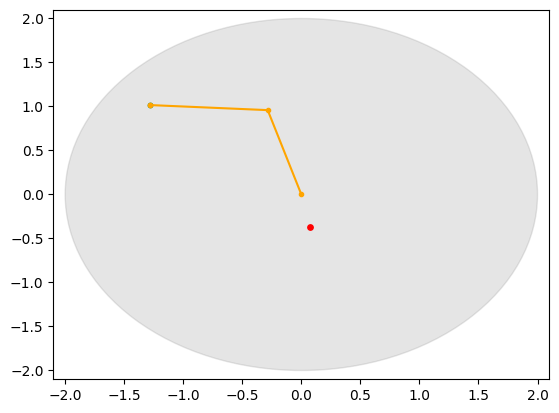

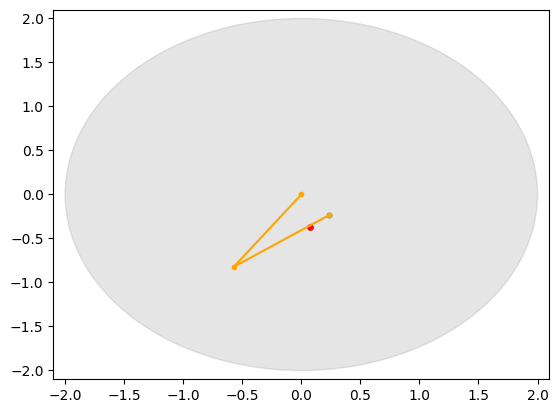

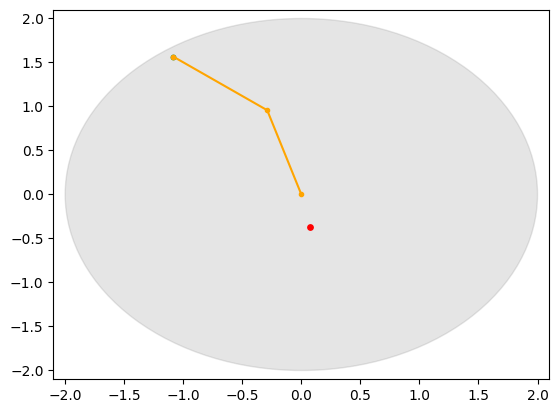

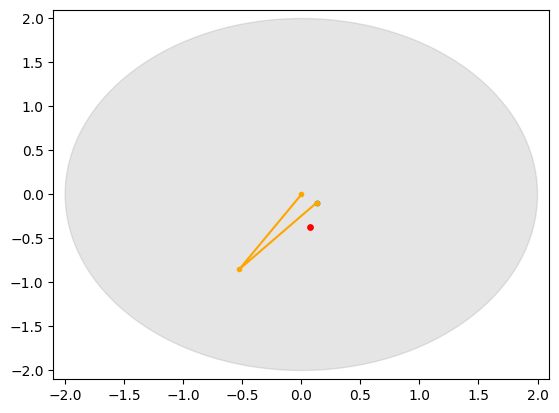

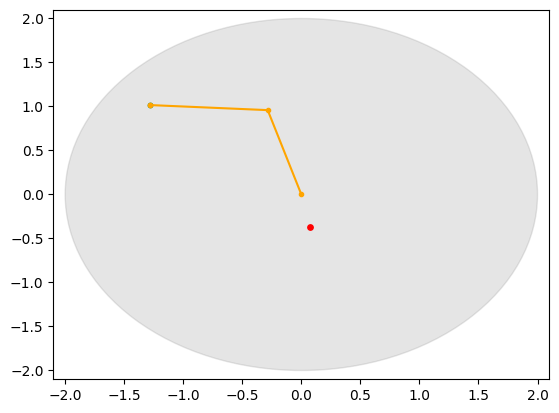

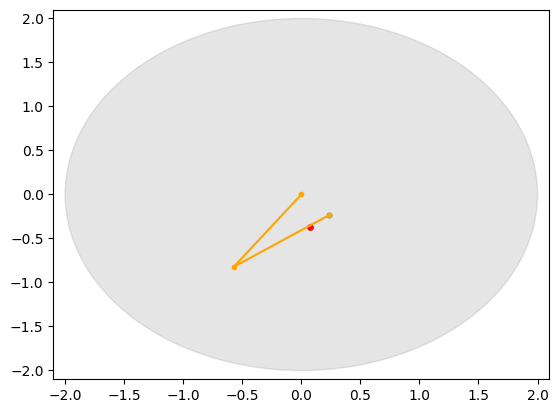

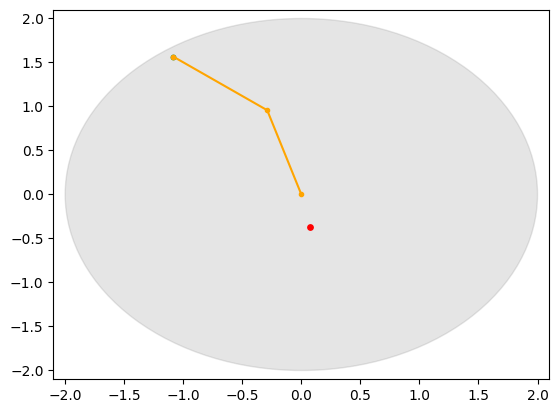

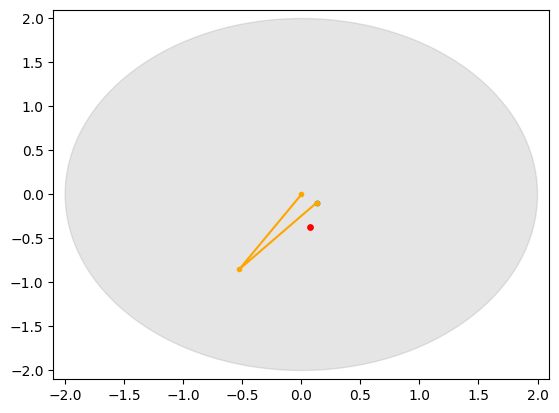

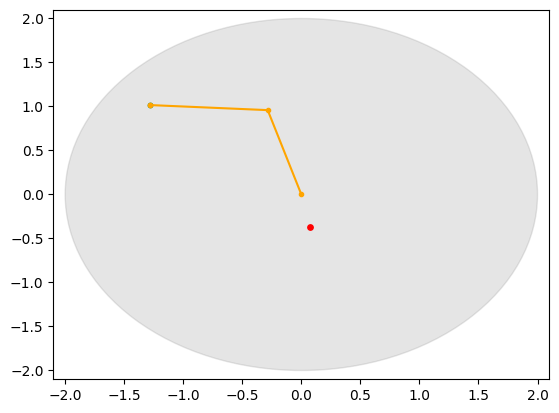

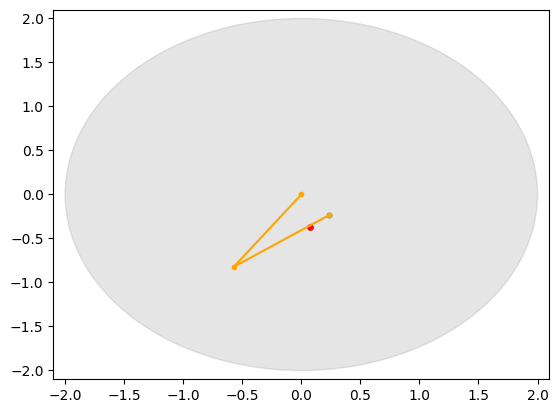

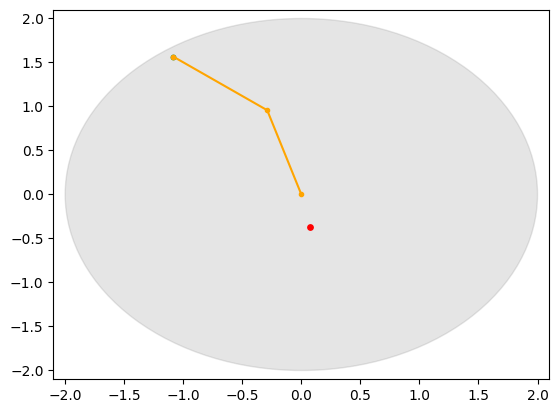

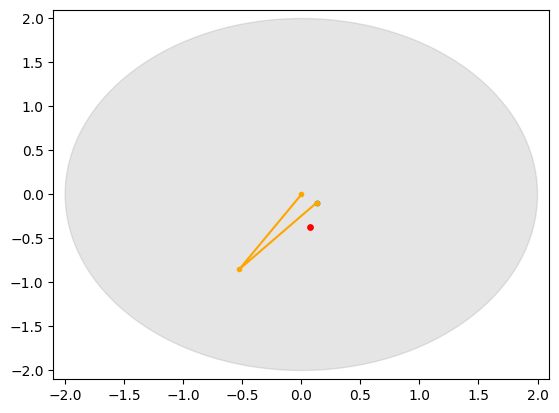

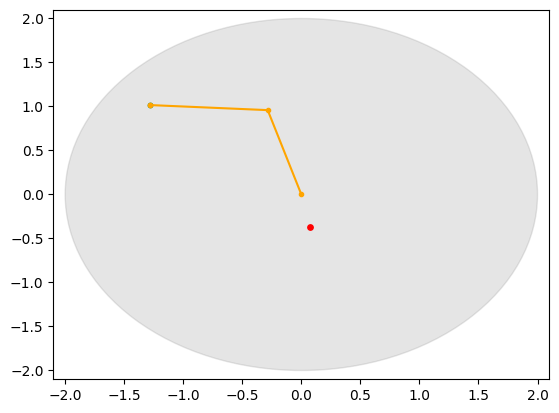

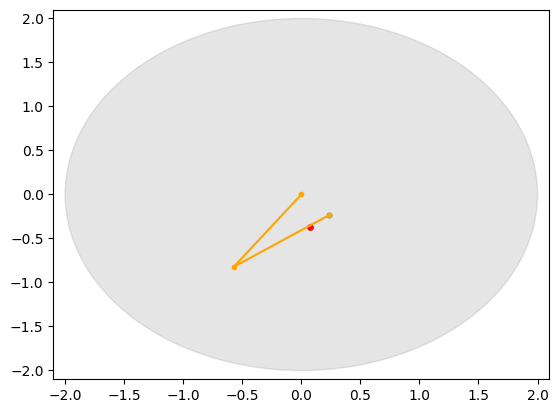

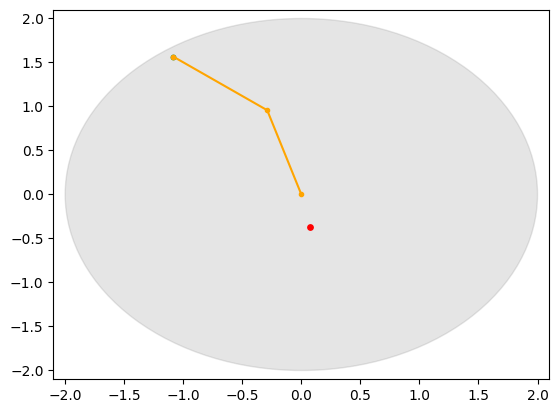

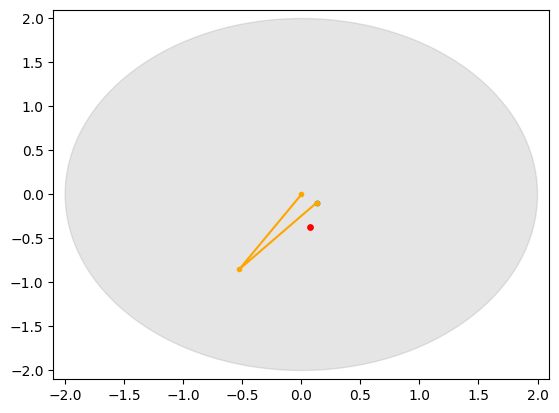

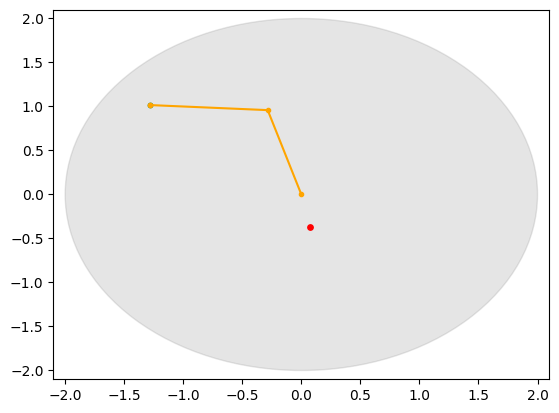

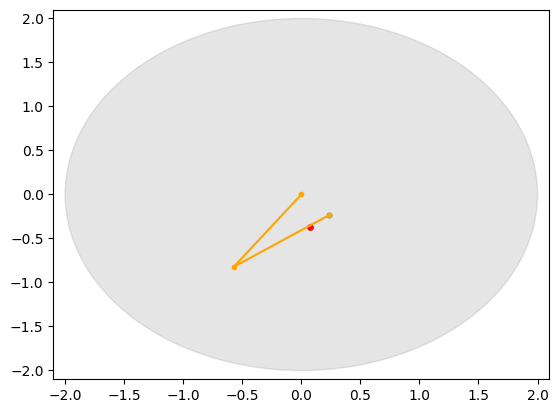

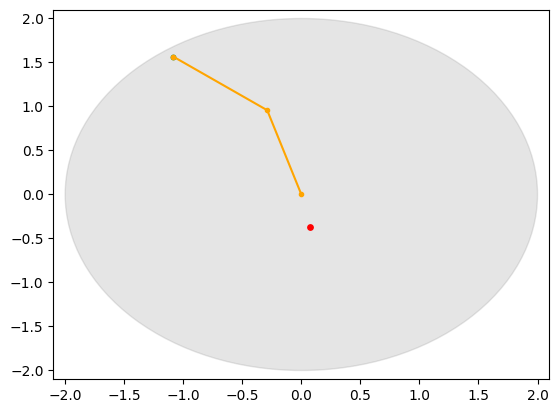

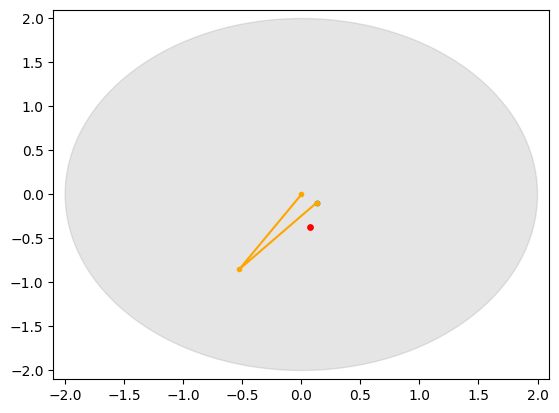

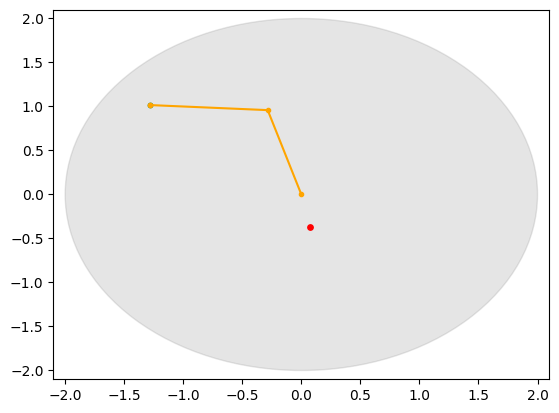

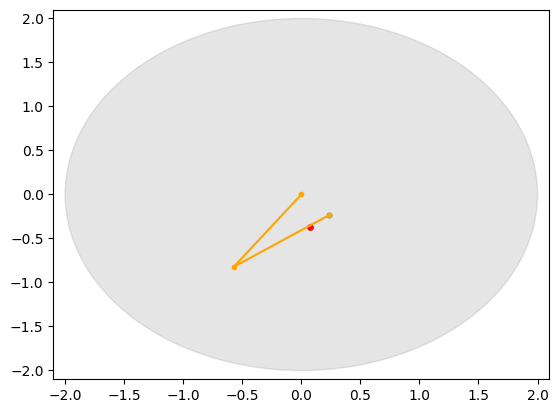

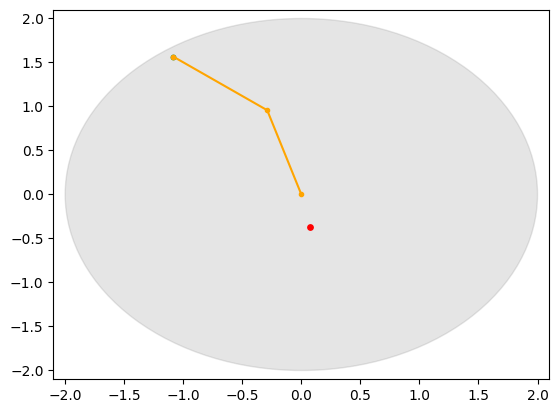

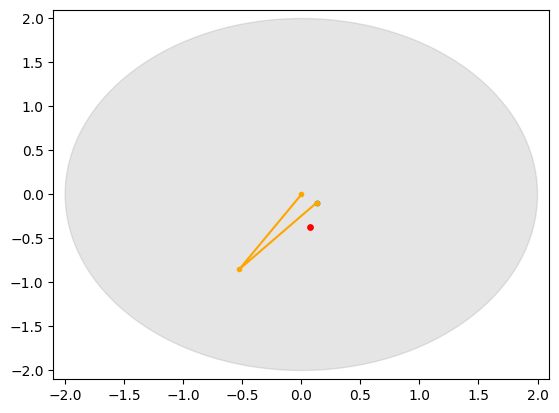

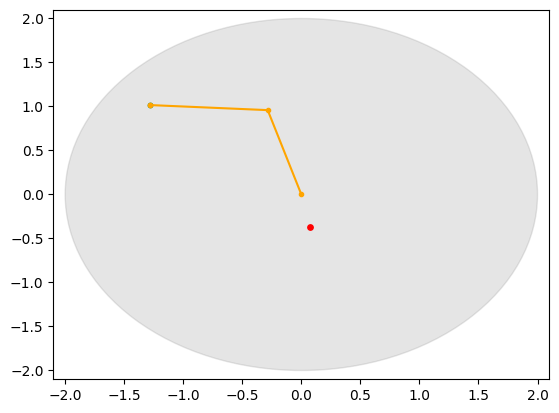

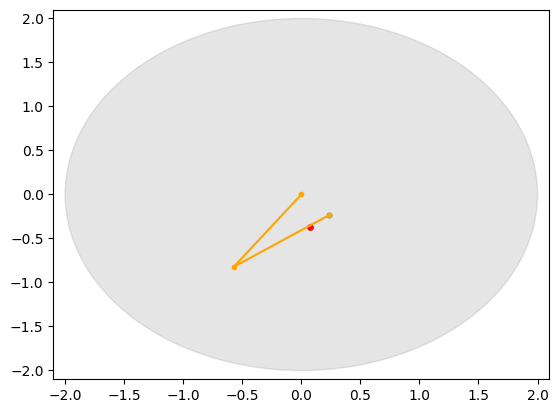

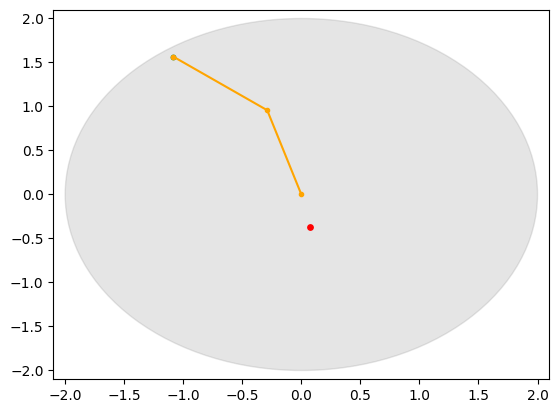

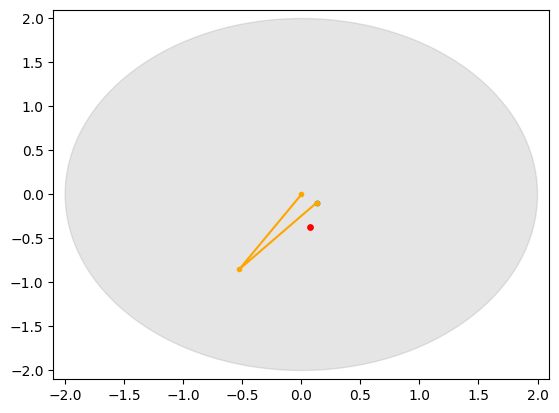

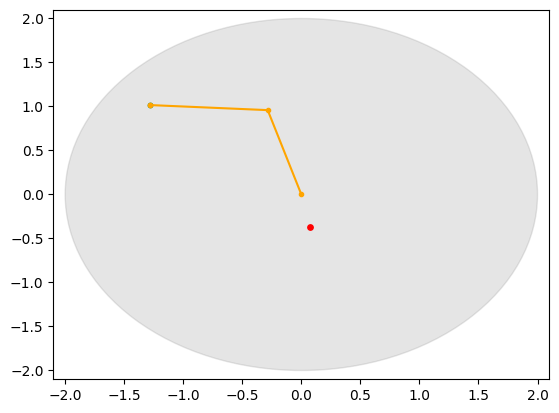

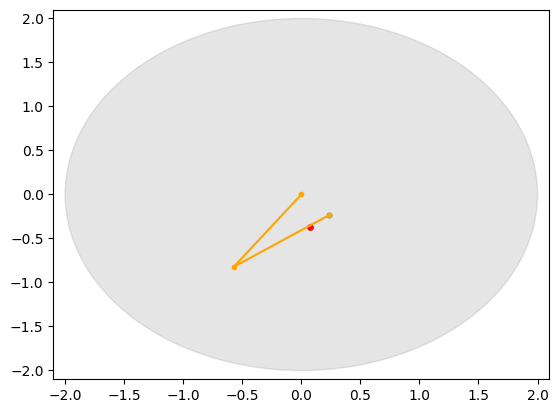

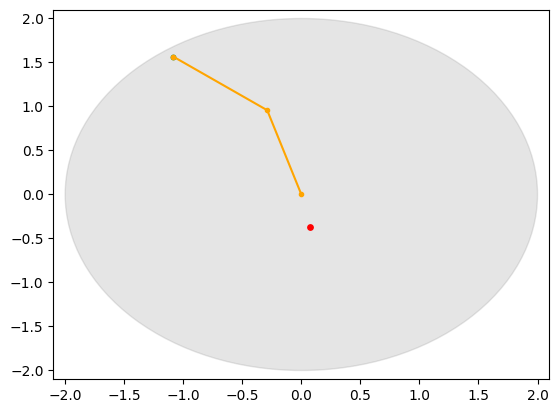

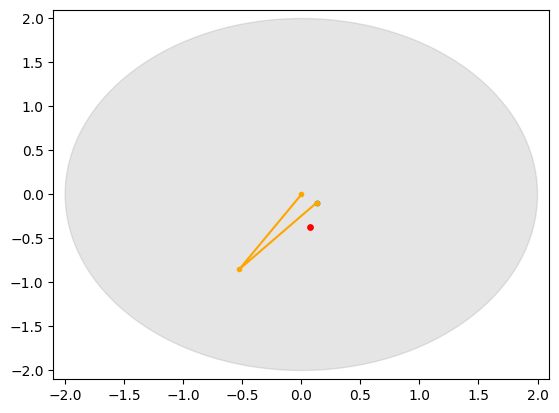

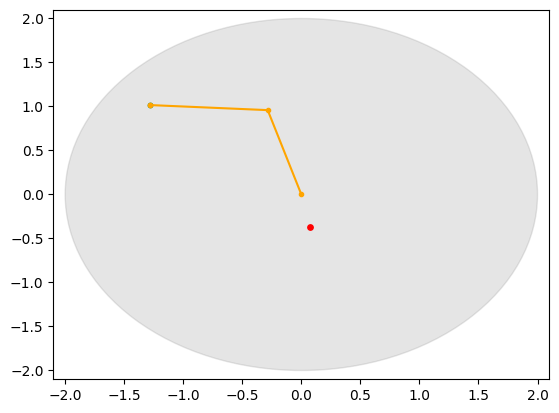

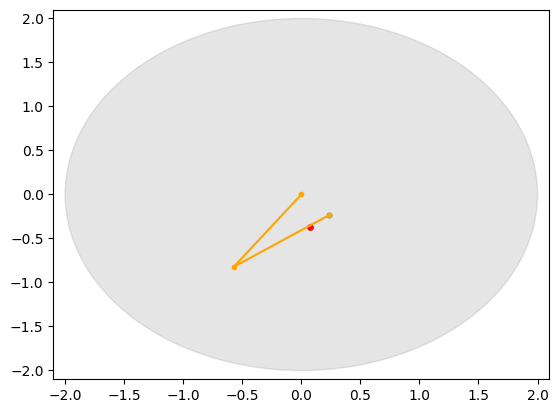

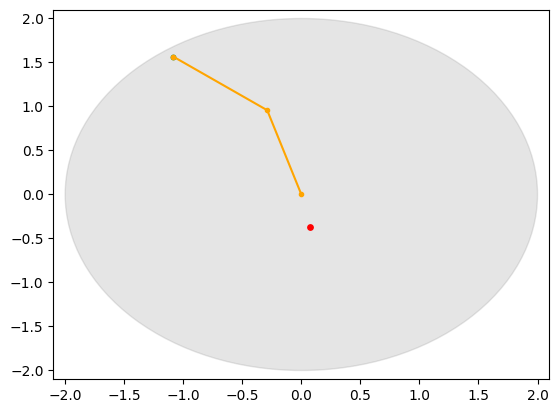

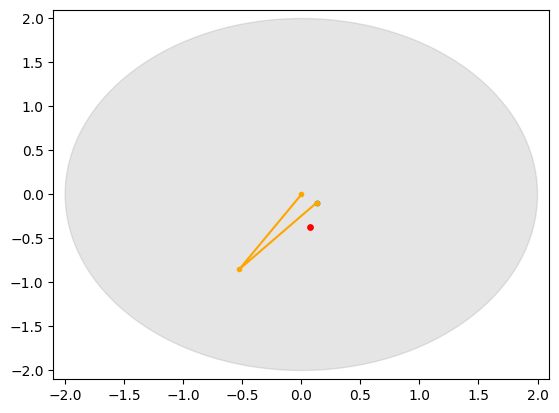

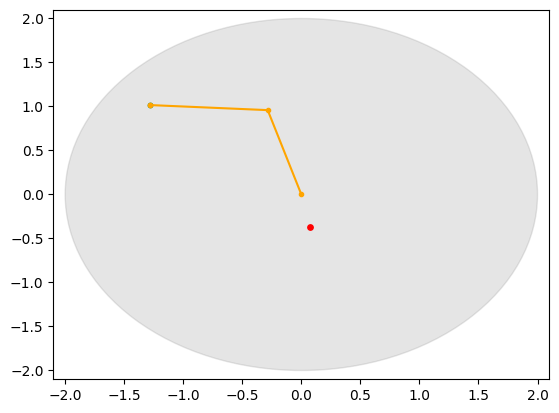

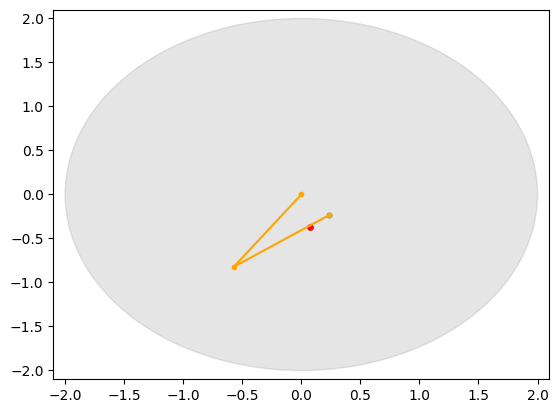

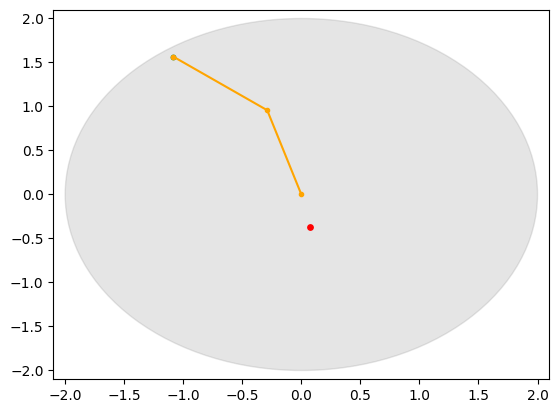

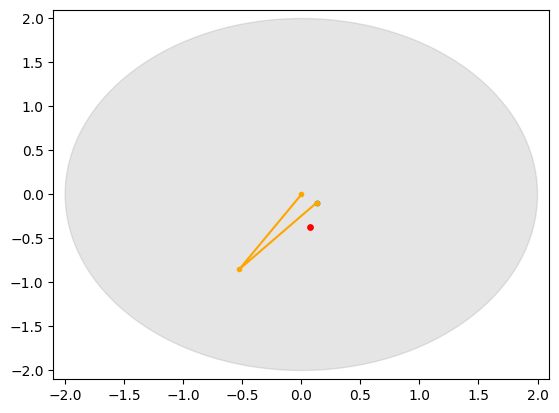

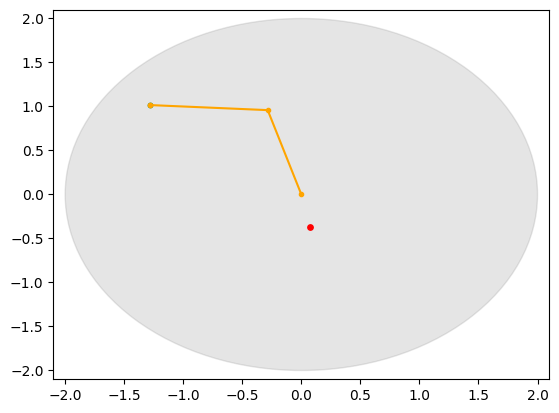

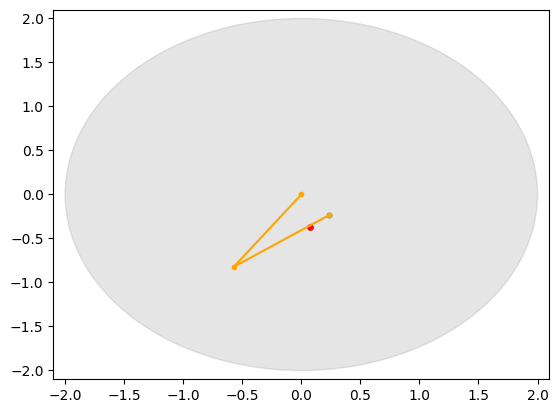

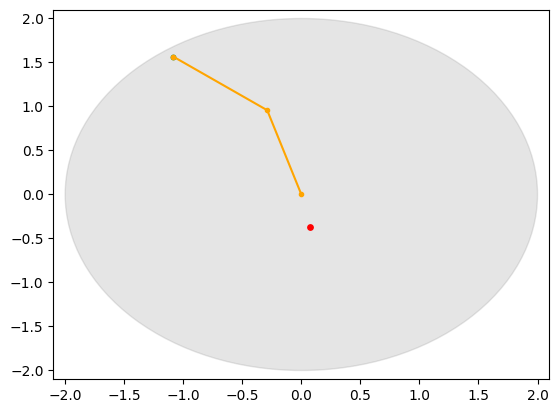

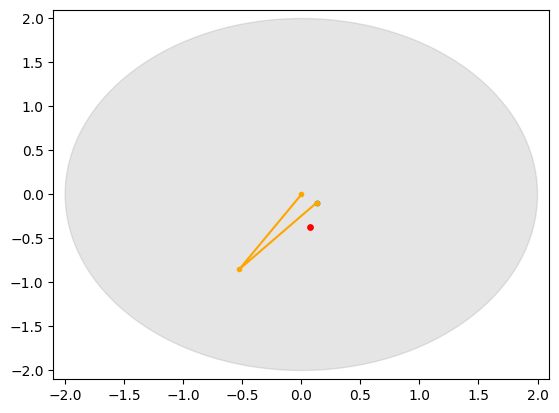

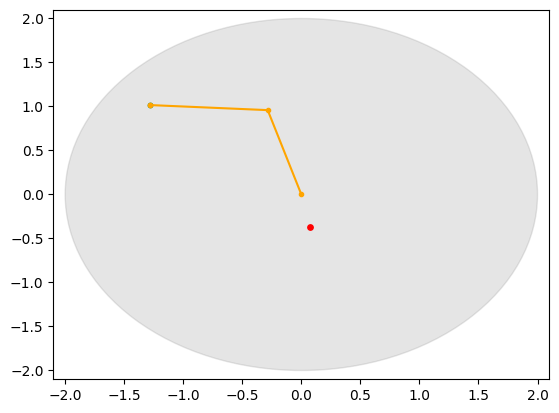

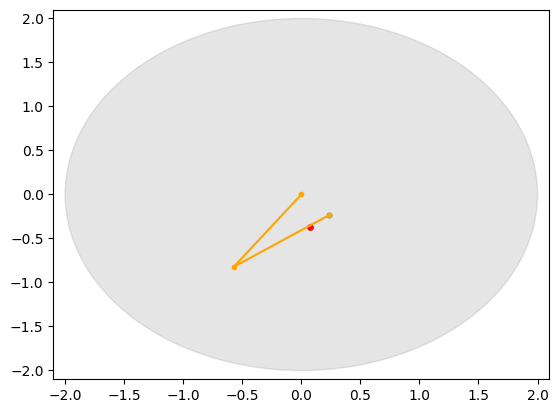

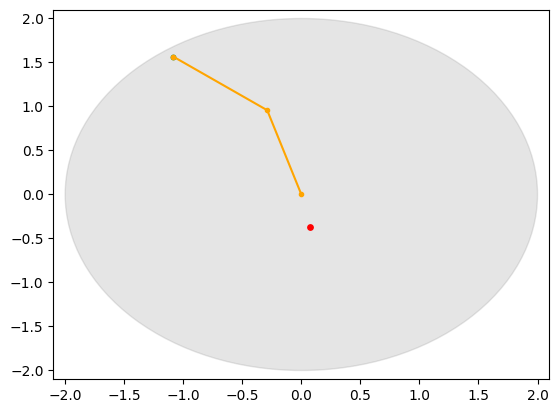

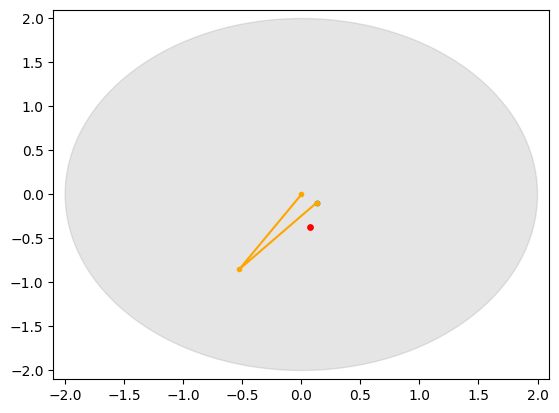

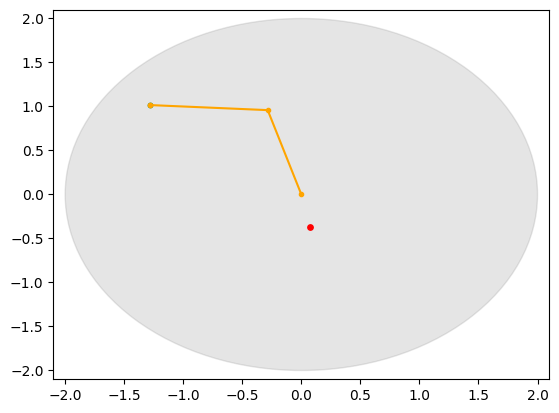

In [12]:
obs, info = env.reset()
while True:
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()
        break